## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'ravdess-1e5rawim' #dataset-compression
TRANSFORM = 'erb-strong_intensity' #transform-group
CHANNEL = ''

In [2]:
path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
if CHANNEL:
    path_list.append(CHANNEL)
print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")
FULL_DATA_NAME='-'.join(path_list)

Name the notebook:
strong_intensity_erb_1e5rawim_ravdess.ipynb


In [3]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.path.join(ROOT_DIR, "results-audio", "case-studies", *path_list)

assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)

GROUP = 'band' 
RERUN = False
SKIP_OPTIMIZE_STEP = False
CWD

'e:\\Research\\UCB\\Strang Lab\\Github\\hierarchical-bayesian-model-validation\\results-audio\\case-studies\\ravdess\\1e5rawim\\erb\\strong_intensity'

In [4]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [5]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data-audio", "subsample-data", f'{FULL_DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data-audio", "subsample-data", f'{FULL_DATA_NAME}-size.pickle'))
NUM_BANDS = int(10) #Change to len(group_data_map) to use all bands

In [6]:
if 'erb' in TRANSFORM:
    group_data_map.popitem()
    print(group_data_map)

{0: array([-0.08382047, -0.07286079, -0.06894614, ...,  0.06833771,
        0.07199583,  0.08382047]), 1: array([-8.6218287 , -8.21741533, -8.03499694, ...,  7.87968866,
        8.04436721,  8.6218287 ]), 2: array([-3.1337206 , -3.03795404, -2.98379786, ...,  2.76813511,
        3.01283406,  3.1337206 ]), 3: array([-7.19306138, -7.00811262, -6.78490143, ...,  6.74304646,
        6.83489957,  7.19306138]), 4: array([-6.38237217, -6.22032843, -5.98681227, ...,  5.98562517,
        6.11683905,  6.38237217]), 5: array([-11.56864709, -10.75136839, -10.45126507, ...,  10.44080195,
        10.7200321 ,  11.56864709]), 6: array([-9.0790025 , -8.78733537, -8.55202004, ...,  8.55122094,
        8.76061836,  9.0790025 ]), 7: array([-8.03585749, -7.70847939, -7.58373265, ...,  7.58158514,
        7.70591104,  8.03585749]), 8: array([-6.88034726, -6.39396888, -6.18872521, ...,  6.18418518,
        6.39343994,  6.88034726]), 9: array([-4.44675573, -3.19497669, -2.95810431, ...,  2.95766618,
        

In [7]:
#if 'fourier' in TRANSFORM:
#    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
#elif 'wavelet' in TRANSFORM:
#    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
#GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::max(len(group_data_map) // NUM_BANDS, 1)]
GROUPS = np.linspace(2, sorted(group_data_map)[-1], NUM_BANDS, dtype=int)


cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = sorted([os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)])
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[:6]: # TODO For quick testing purposes. Currently excluding 20000 CDFs. Use cdfs_list[5:6] to access CDFs/_test
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # TODO For quick testing purposes
#group_total_samples
#group_data_map


Running 12760 CDFs


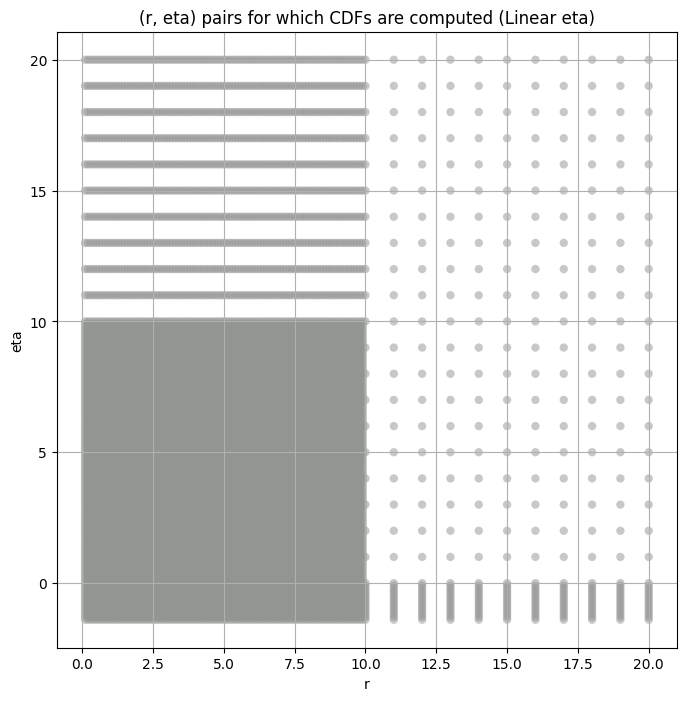

(r,eta),cdf    r  eta  \
0  ((0.1, -1.4), <scipy.interpolate._fitpack2.Int...  0.1 -1.4   
1  ((0.1, -1.3), <scipy.interpolate._fitpack2.Int...  0.1 -1.3   
2  ((0.1, -1.2), <scipy.interpolate._fitpack2.Int...  0.1 -1.2   
3  ((0.1, -1.1), <scipy.interpolate._fitpack2.Int...  0.1 -1.1   
4  ((0.1, -1.0), <scipy.interpolate._fitpack2.Int...  0.1 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.628800e+06   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.991680e+07   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  2.395008e+08   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.037837e+09   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.632429e+09   

        kurtosis  
0  554265.000000  
1   96192.272727  
2   29390.000000  
3   11997.692308  
4    5874.890110

In [8]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
fine_cdfs_df = all_cdfs_df.copy()
all_cdfs_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 1) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 1) == all_cdfs_df['eta'])]
all_cdfs_df = all_cdfs_df.reset_index(drop=True)
all_cdfs = {x[0] : x[1] for x in all_cdfs_df["(r,eta),cdf"]}
                                             
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
temp_cdf = all_cdfs_df
print(f"Running {all_cdfs_df.shape[0]} CDFs")
create_scatter_plot(all_cdfs_df);
all_cdfs_df.head()

## Bootstrapping the Variance and Kurtosis

In [9]:
n_bootstrap = int(1e5) # TODO For quick testing purposes
bootstrap_size = int(1e4) # TODO For quick testing purposes
ci = 0.99

In [10]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists(): # TODO For quick testing purposes
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Band 2


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 3


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 5


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 6


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 8


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 9


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 11


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 12


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 14


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Band 16


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

obs_var  var_lower  var_upper    obs_kurt  kurt_lower   kurt_upper  \
band                                                                        
2     0.015341   0.011793   0.019896  102.005766   45.615246   155.675962   
3     0.185978   0.146709   0.230087   74.103587   59.877733    90.725954   
5     1.797692   1.637296   1.963972   10.521700    9.181393    11.971747   
6     1.544318   1.409121   1.683306    9.932279    8.877620    11.035971   
8     0.189802   0.164122   0.219125   29.858671   20.356153    40.820327   
9     0.046299   0.041095   0.052620   20.826506   11.310724    47.855935   
11    0.016433   0.013552   0.019878   52.489348   32.374524    95.887777   
12    0.006914   0.005487   0.008786   81.450725   44.067905   173.960469   
14    0.000467   0.000345   0.000849  414.737436   42.091085  1292.568079   
16    0.000101   0.000063   0.000171  410.975885  117.849619  1103.934584   

      total_samples  
band                 
2           98473.0  
3          109656.0  
5         1086255.0  
6          548700.0  
8         3556612.0  
9         5336598.0  
11        6762724.0  
12       22271101.0  
14       12539235.0  
16        8199664.0

## Initial Grid Search and Hypothesis Test Plots

In [11]:
EXCLUDE_CUTOFFS = [0, 25, 50, 75, 100, 150, 200, 250, 300, 350, 500] # TODO For quick testing purposes
SCALE_CAP = 1e5

In [12]:
augmented_var_df_path = Path(os.path.join(CWD, "CSVs", "augmented_var_df.csv"))
augmented_var_df = var_kurt_df[['obs_var']].copy()
augmented_var_df
for val in EXCLUDE_CUTOFFS:
    temp_arr = []
    for group in GROUPS:
        if val != 0:
            temp_arr.append(np.var(group_data_map[group][val:-val]))
        else:
            temp_arr.append(np.var(group_data_map[group]))

    augmented_var_df[f"var_exclude_{val}"] = temp_arr
augmented_var_df

obs_var  var_exclude_0  var_exclude_25  var_exclude_50  var_exclude_75  \
band                                                                            
2     0.015341       0.015341        0.012569        0.011217        0.010350   
3     0.185978       0.185978        0.166668        0.151866        0.139593   
5     1.797692       1.797692        1.750949        1.713063        1.679223   
6     1.544318       1.544318        1.511084        1.481771        1.454558   
8     0.189802       0.189802        0.175489        0.166465        0.159469   
9     0.046299       0.046299        0.043295        0.041747        0.040559   
11    0.016433       0.016433        0.014715        0.013745        0.012993   
12    0.006914       0.006914        0.005968        0.005483        0.005116   
14    0.000467       0.000467        0.000375        0.000345        0.000323   
16    0.000101       0.000101        0.000070        0.000058        0.000050   

      var_exclude_100  var_exclude_150  var_exclude_200  var_exclude_250  \
band                                                                       
2            0.009734         0.008942         0.008435         0.008056   
3            0.128889         0.111521         0.098310         0.087230   
5            1.647978         1.591359         1.540376         1.493812   
6            1.429040         1.382094         1.339520         1.300325   
8            0.153625         0.144143         0.136590         0.130290   
9            0.039565         0.037933         0.036592         0.035436   
11           0.012369         0.011359         0.010555         0.009887   
12           0.004818         0.004345         0.003976         0.003675   
14           0.000304         0.000275         0.000253         0.000234   
16           0.000045         0.000037         0.000031         0.000027   

      var_exclude_300  var_exclude_350  var_exclude_500  
band                                                     
2            0.007745         0.007480         0.006850  
3            0.078294         0.070826         0.054990  
5            1.450900         1.411108         1.306640  
6            1.263914         1.229792         1.138684  
8            0.124863         0.120096         0.108491  
9            0.034412         0.033486         0.031128  
11           0.009317         0.008821         0.007644  
12           0.003420         0.003201         0.002690  
14           0.000219         0.000205         0.000173  
16           0.000024         0.000022         0.000017

####
Band  2


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 0 0.007082841749646546 0.01534060033824928


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 25 0.006310619186936761 0.012569416279550138


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 50 0.005719228033346485 0.011217158699844083


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 75 0.007278947592524898 0.010349514587301554


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 100 0.004364716755096587 0.009733512804906003


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 150 0.005385614098371794 0.008941793264472812


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 200 0.00780830047556319 0.008434651408667214


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 250 0.006231579063629256 0.008056334983735411


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 300 0.005061418916918414 0.007745207446746696


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 350 0.006402458574867861 0.007480437684095315


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 500 0.008161538794332346 0.006849680346129879
Number of samples: 100000, Without approximation : 98473.0


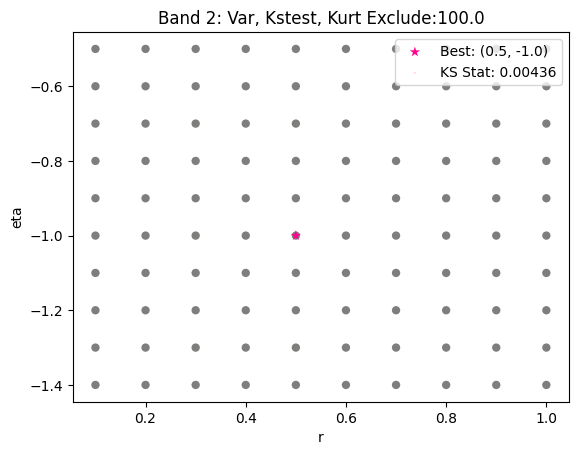

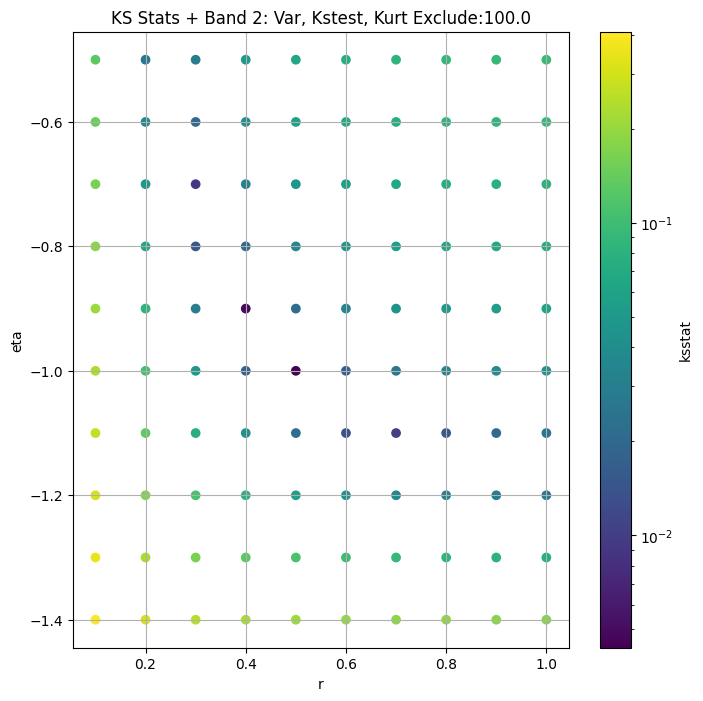

####
Band  3


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 0 0.027783431376024126 0.1859777852225041


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 25 0.023163227231002725 0.16666840095843086


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 50 0.02298414768793572 0.1518664647196733


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 75 0.02542108725693415 0.13959274239684746


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 100 0.025374117654741846 0.12888877980153304


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 150 0.019017621703968368 0.11152093412056331


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 200 0.01799901444935703 0.09830987741721373


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 250 0.01954346061111434 0.0872300200677077


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 300 0.01446203636308152 0.07829405027395997


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 350 0.01278172665870736 0.07082597394976002


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 500 0.010929852820086334 0.054989864146717686
Number of samples: 100000, Without approximation : 109656.0


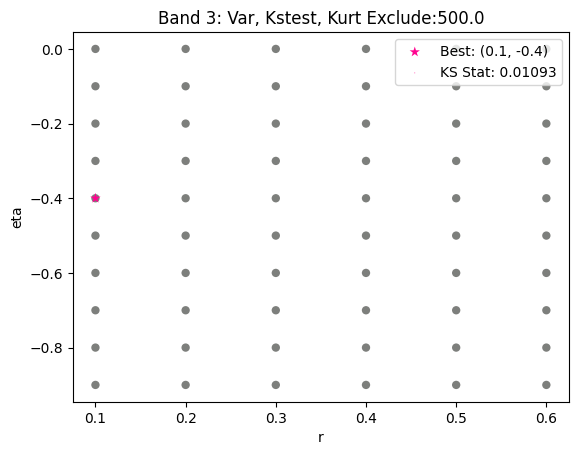

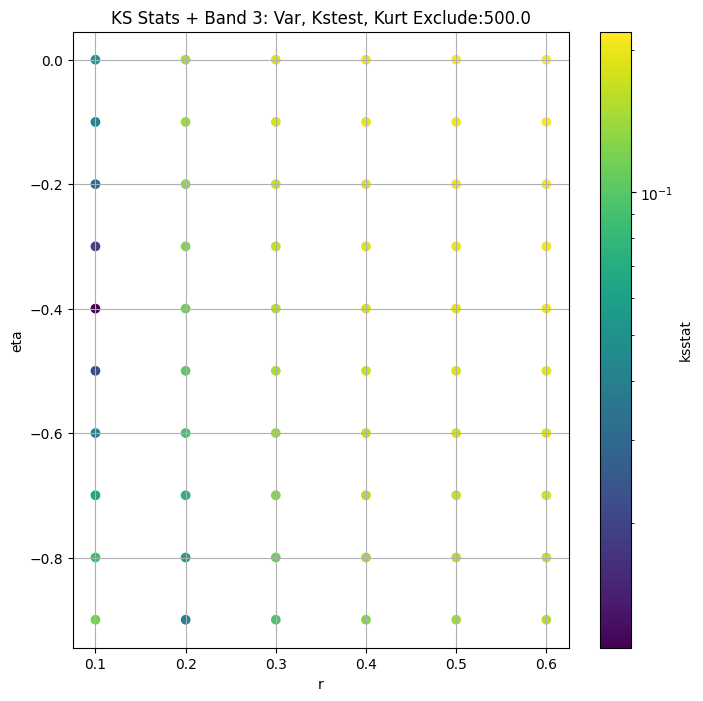

####
Band  5


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 0 0.013434091482963928 1.7976923134778813


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 25 0.012247130098304915 1.750948558683777


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 50 0.011258431609836639 1.7130632340379561


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 75 0.010375805836552843 1.6792233955501388


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 100 0.01110039742179833 1.647977813671865


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 150 0.012507745782504034 1.5913585268014983


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 200 0.013806167587671989 1.5403763669345483


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 250 0.01504237209210496 1.4938122113926482


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 300 0.016230649310605583 1.4509000231127125


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 350 0.016347839532118713 1.4111083717330835


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 500 0.015174177624188927 1.3066398839531808
Number of samples: 100000, Without approximation : 1086255.0


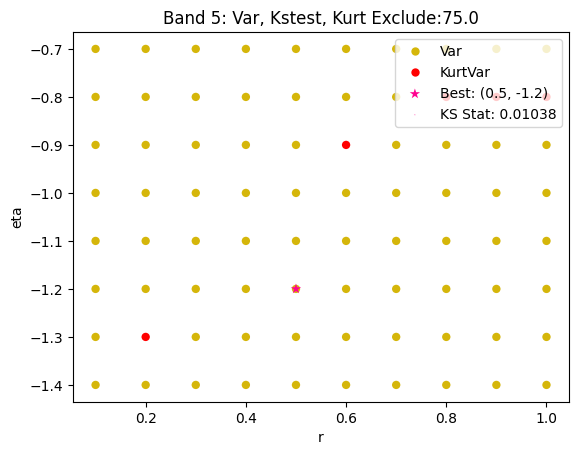

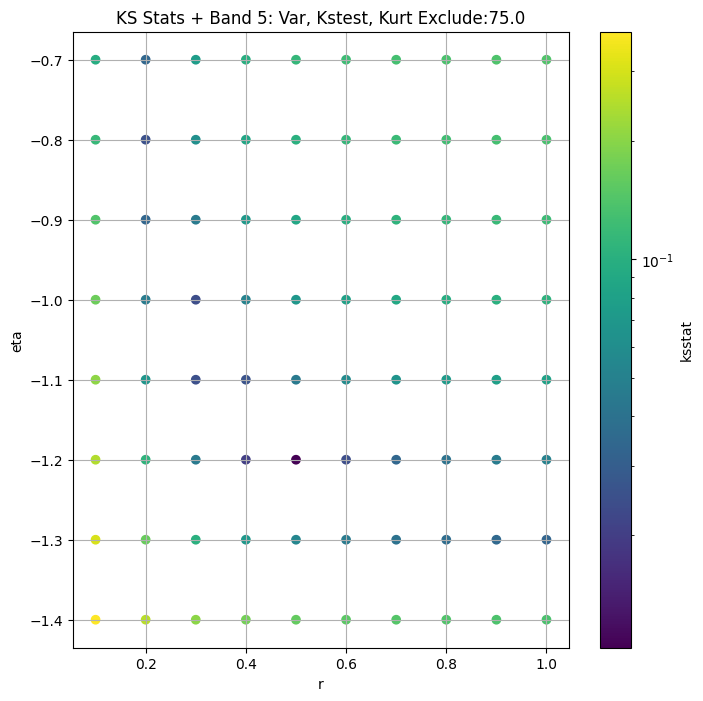

####
Band  6


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 0 0.012721392026278422 1.5443181146728264


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 25 0.011655749930298609 1.511083542398612


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 50 0.010694238741490003 1.4817712112775696


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 75 0.01086332999966938 1.454558147677948


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 100 0.011130517814455398 1.4290399779904226


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 150 0.011639330371543799 1.3820939083505173


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 200 0.01212483411481513 1.3395199344351558


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 250 0.013008953365761307 1.30032514062992


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 300 0.013967789450449249 1.2639144278495171


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 350 0.014898735249842428 1.2297920620507015


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 500 0.014035660709458185 1.1386837140984116
Number of samples: 100000, Without approximation : 548700.0


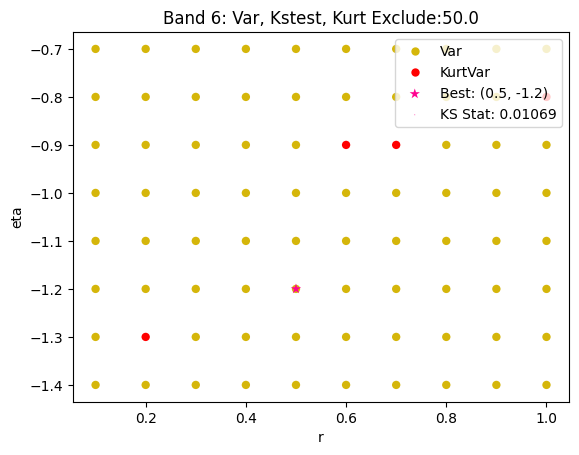

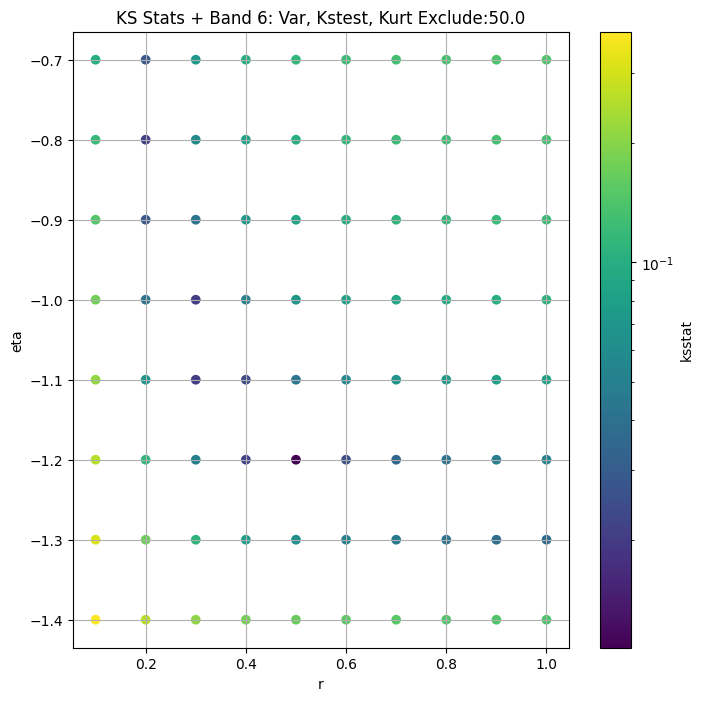

####
Band  8


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 0 0.004406303081041341 0.1898015084012417


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 25 0.006480905083059707 0.17548935332479945


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 50 0.008177362010600875 0.16646500476805215


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 75 0.009683207692710916 0.15946931237234105


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 100 0.009110600824604576 0.1536245419661541


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 150 0.006730336384323632 0.14414324607912046


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 200 0.0038670795764882415 0.1365901237386756


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 250 0.0055527811499250235 0.1302903426035364


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 300 0.007583439961684979 0.12486291528346531


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 350 0.009545053303540996 0.12009623180196943


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 500 0.009040089485141782 0.10849117117483305
Number of samples: 100000, Without approximation : 3556612.0


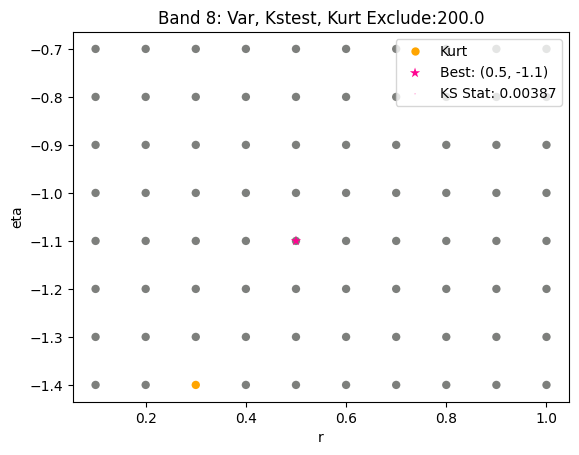

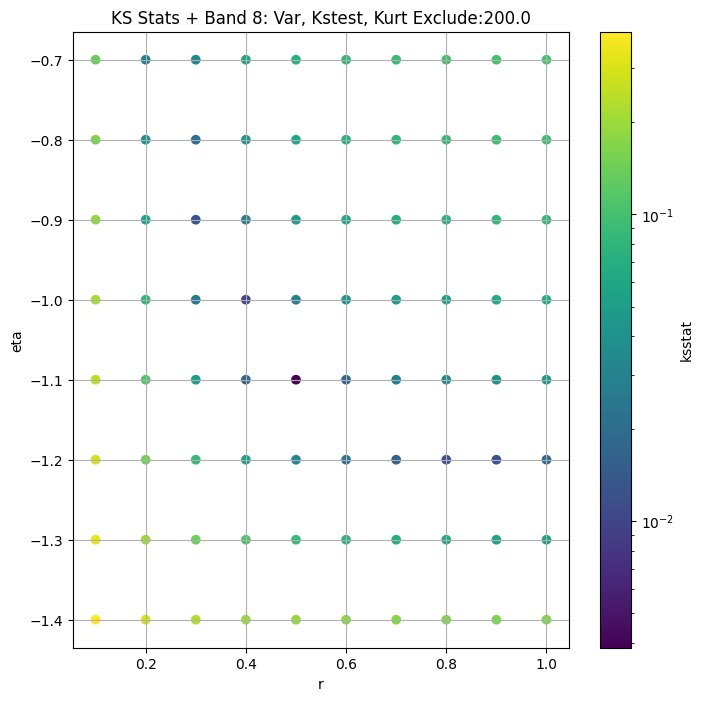

####
Band  9


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 0 0.003330860048559453 0.0462991698881081


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 25 0.00712198405731479 0.04329487103658506


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 50 0.00891883143615646 0.04174725842483172


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 75 0.007610378759453584 0.04055909149278242


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 100 0.006488647065411746 0.039565413361619756


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 150 0.006726087911179429 0.03793253600107672


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 200 0.008493533815227827 0.03659191423724123


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 250 0.00842992491269251 0.03543618024143578


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 300 0.008233330437617925 0.0344115348872032


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 350 0.008104107264853333 0.03348580292097353


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 500 0.007756781958703884 0.031127787127247127
Number of samples: 100000, Without approximation : 5336598.0


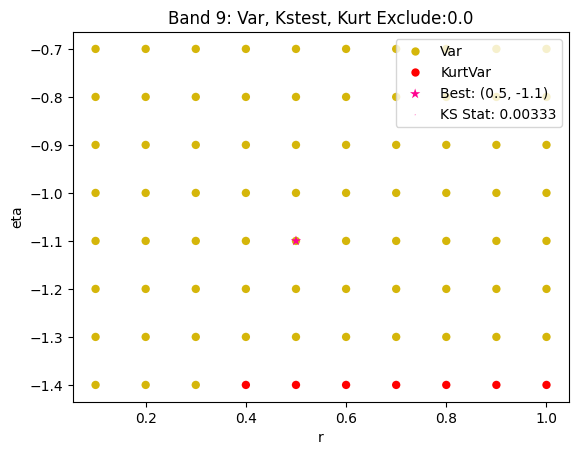

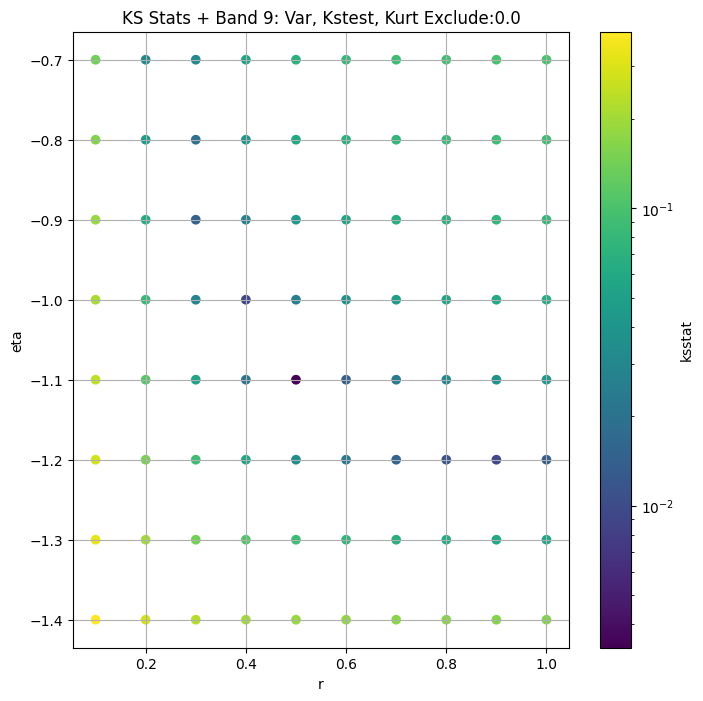

####
Band  11


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 0 0.010580210759631059 0.016433312708337287


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 25 0.011830998767644041 0.014715328113465919


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 50 0.009142398770589755 0.013744811711543832


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 75 0.00700307637636699 0.012993262435678297


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 100 0.006592470529386205 0.012368668792461903


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 150 0.007518798965347018 0.011359148843305975


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 200 0.00840519046320648 0.01055479577604572


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 250 0.009269586888724313 0.009887422459179994


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 300 0.010615198895622069 0.009317272216422706


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 350 0.013314323508600998 0.008821104203934919


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 500 0.012723884376749539 0.0076438810546481575
Number of samples: 100000, Without approximation : 6762724.0


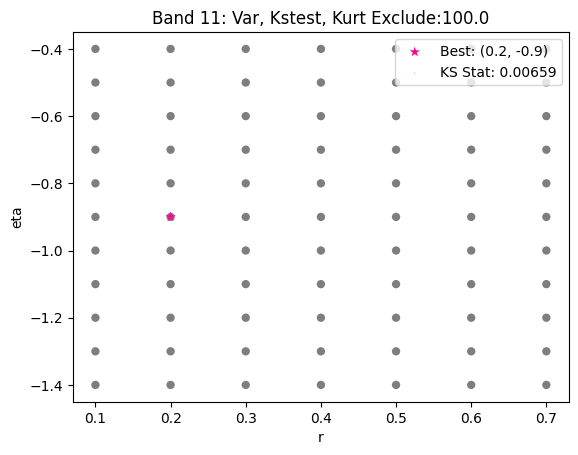

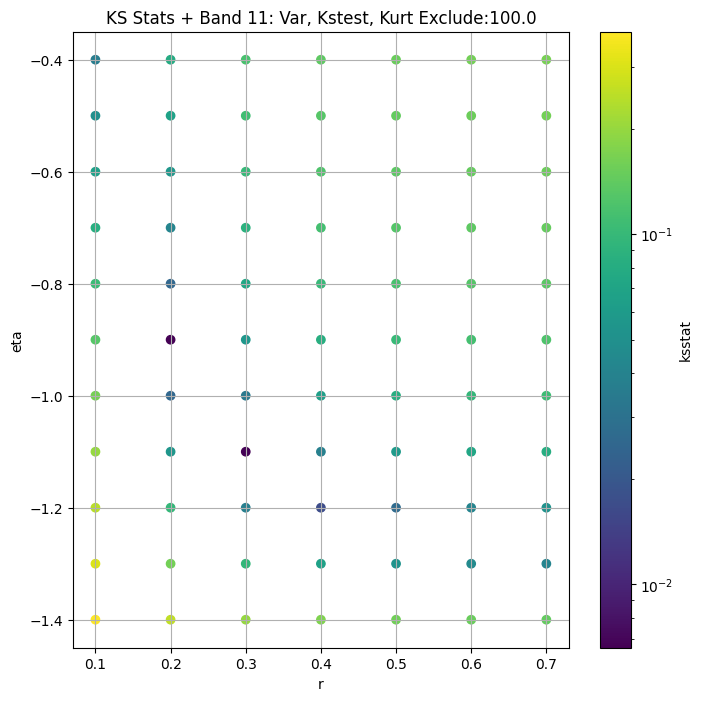

####
Band  12


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 0 0.009238006870396998 0.006913674958767021


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 25 0.004699771628502103 0.005967990120357517


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 50 0.007490028764559148 0.005482767888822784


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 75 0.008861807925409027 0.005116484573347985


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 100 0.009446199824435286 0.004818350070020735


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 150 0.008245972390906048 0.004345250011264424


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 200 0.008770777341121083 0.003976204749725301


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 250 0.006254371887670477 0.0036745188501095725


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 300 0.00726582943391775 0.0034201911005659687


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 350 0.008354850663051382 0.003201319948520306


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 500 0.011165243466492836 0.002689786511280858
Number of samples: 100000, Without approximation : 22271101.0


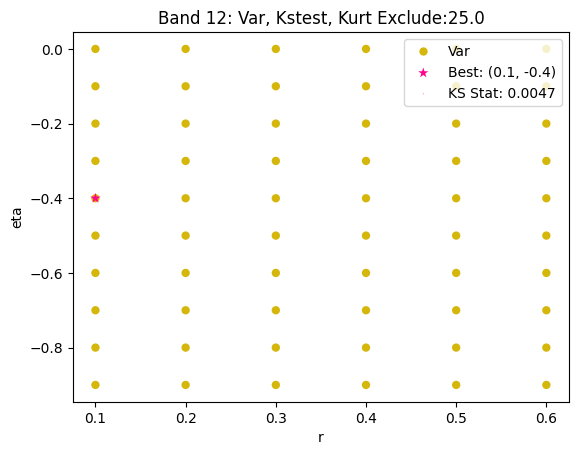

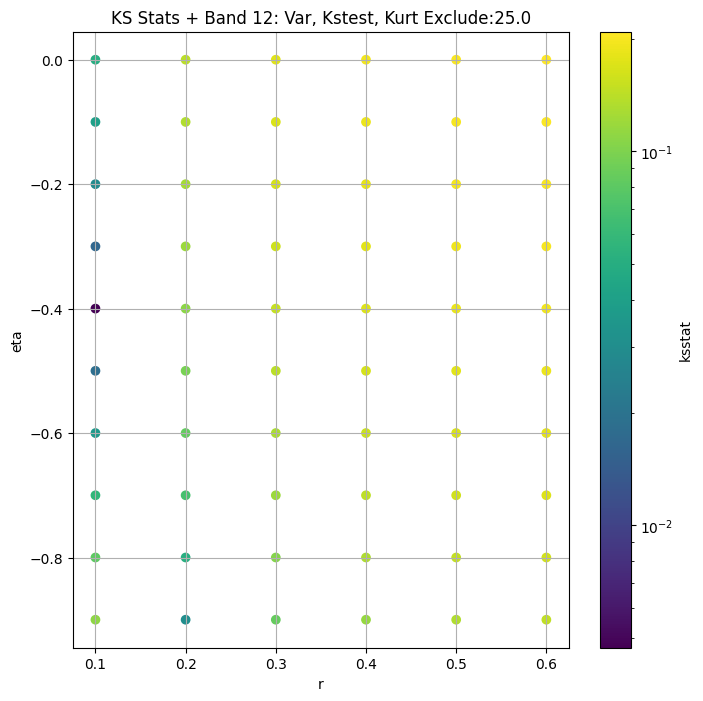

####
Band  14


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 0 0.006548656299872058 0.00046689526182187223


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 25 0.003161133111906758 0.00037489887911339577


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 50 0.004620935940959248 0.0003449385703399197


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 75 0.005755320741917314 0.0003225449658495989


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 100 0.0051472440838611945 0.00030433941271743677


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 150 0.007052479184765481 0.0002754284788969881


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 200 0.007381738535326643 0.00025282478718820776


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 250 0.009209245892288796 0.0002343199981201703


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 300 0.009547032280514234 0.00021867066754790228


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 350 0.007490072004497465 0.00020517910450421886


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 500 0.01058441745622667 0.00017348262784796617
Number of samples: 100000, Without approximation : 12539235.0


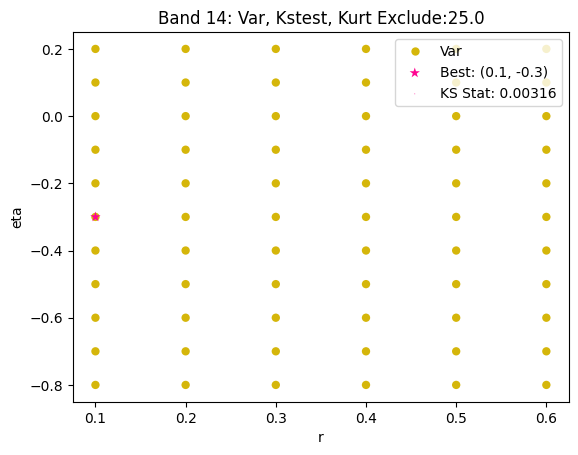

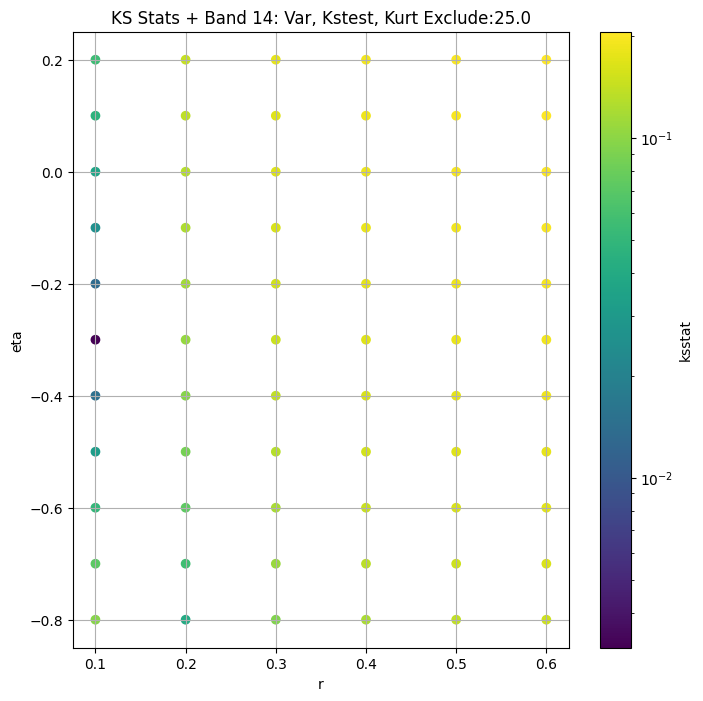

####
Band  16


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 0 0.021957877252160085 0.00010118071850051188


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 25 0.016332802465696017 6.958197505056427e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 50 0.020259515763990987 5.8034100396421544e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 75 0.01471805589794406 5.0304417079489874e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 100 0.013240241817846055 4.462714712211661e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 150 0.012016451845214049 3.659310979266872e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 200 0.0109948403860608 3.1076249969768346e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 250 0.008820162164965506 2.7051326160609784e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 300 0.007651687285170072 2.3963605297254062e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 350 0.008687707668453948 2.152747360141048e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 500 0.01162046517694195 1.655546733900301e-05
Number of samples: 100000, Without approximation : 8199664.0


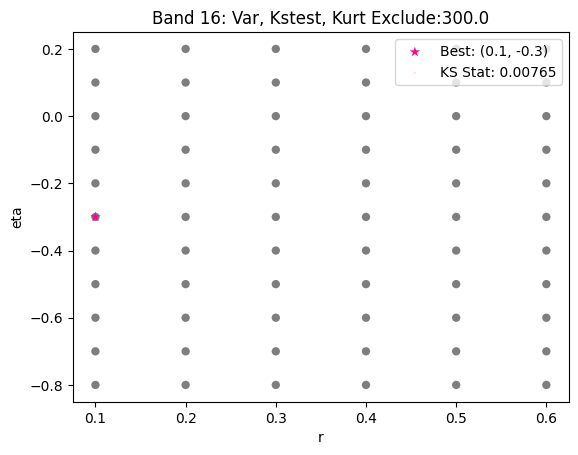

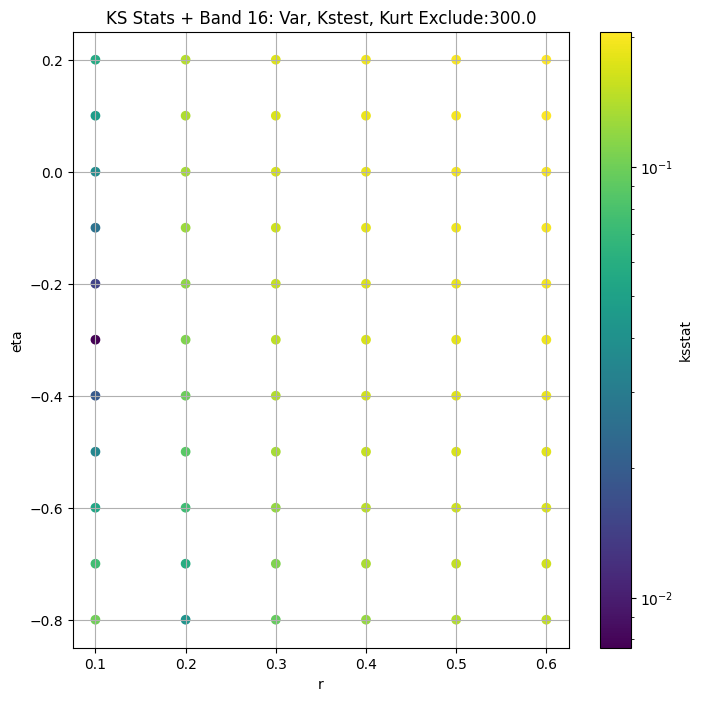

obs_var  var_lower  var_upper    obs_kurt  kurt_lower   kurt_upper  \
band                                                                        
2     0.015341   0.011793   0.019896  102.005766   45.615246   155.675962   
3     0.185978   0.146709   0.230087   74.103587   59.877733    90.725954   
5     1.797692   1.637296   1.963972   10.521700    9.181393    11.971747   
6     1.544318   1.409121   1.683306    9.932279    8.877620    11.035971   
8     0.189802   0.164122   0.219125   29.858671   20.356153    40.820327   
9     0.046299   0.041095   0.052620   20.826506   11.310724    47.855935   
11    0.016433   0.013552   0.019878   52.489348   32.374524    95.887777   
12    0.006914   0.005487   0.008786   81.450725   44.067905   173.960469   
14    0.000467   0.000345   0.000849  414.737436   42.091085  1292.568079   
16    0.000101   0.000063   0.000171  410.975885  117.849619  1103.934584   

      total_samples  kstest_stat_initial  initial_r  initial_eta  \
band                                                               
2           98473.0             0.004365        0.5         -1.0   
3          109656.0             0.010930        0.1         -0.4   
5         1086255.0             0.010376        0.5         -1.2   
6          548700.0             0.010694        0.5         -1.2   
8         3556612.0             0.003867        0.5         -1.1   
9         5336598.0             0.003331        0.5         -1.1   
11        6762724.0             0.006592        0.2         -0.9   
12       22271101.0             0.004700        0.1         -0.4   
14       12539235.0             0.003161        0.1         -0.3   
16        8199664.0             0.007652        0.1         -0.3   

      initial_scale  initial_exclude_cutoff  best_augmented_var  \
band                                                              
2      4.866756e-03                   100.0            0.009734   
3      8.202025e-14                   500.0            0.054990   
5      1.749191e+00                    75.0            1.679223   
6      1.543512e+00                    50.0            1.481771   
8      9.485425e-02                   200.0            0.136590   
9      3.215220e-02                     0.0            0.046299   
11     4.908202e-06                   100.0            0.012369   
12     8.901568e-15                    25.0            0.005968   
14     2.929044e-16                    25.0            0.000375   
16     1.872251e-17                   300.0            0.000024   

      kstest_stat_cutoff_0.05  
band                           
2                    0.004326  
3                    0.004100  
5                    0.001303  
6                    0.001833  
8                    0.000720  
9                    0.000588  
11                   0.000522  
12                   0.000288  
14                   0.000384  
16                   0.000474

In [13]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))

rEtaKsstats_dict = dict()

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS): # TODO For quick testing purposes
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        if len(sample) == 0:
            continue
        group_cdfs_df = all_cdfs_df.copy()
        master_df.loc[group, 'kstest_stat_initial'] = 1

        for j in range(len(EXCLUDE_CUTOFFS)):

            exclude_cutoff = EXCLUDE_CUTOFFS[j]
            exclude_cutoff = int(exclude_cutoff)

            if exclude_cutoff == 0:
                augmented_var = np.var(group_data_map[group]) 
            else:
                augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])
                if augmented_var == np.var(group_data_map[group]):
                    continue 
                
            group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
            ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True, scales=group_cdfs_df['scale'])
            augmented_var_df.loc[group, f"kstest_stat_{exclude_cutoff}"] = min_stat
            group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] = ksstats
            
            print(group, exclude_cutoff, min_stat, augmented_var)
            
            if (min_stat < master_df.loc[group, 'kstest_stat_initial']) and not np.isclose(min_stat, master_df.loc[group, 'kstest_stat_initial'], 1e-6):
                inital_min_stat = min_stat
                inital_best_param = initial_param
                master_df.loc[group, 'kstest_stat_initial'] = min_stat
                initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
                master_df.loc[group, 'initial_scale'] = initial_scale
                master_df.loc[group, 'initial_exclude_cutoff'] = exclude_cutoff
                master_df.loc[group, 'best_augmented_var'] = augmented_var
        
        ksstats = group_cdfs_df[f"ksstat_exclude_{int(master_df.loc[group, 'initial_exclude_cutoff'])}"]
            
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

        group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
        group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

        group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

        group_dict = {'r' : group_cdfs_df['r'], 'eta' : group_cdfs_df['eta']}
        group_dict.update({f'ksstat_exclude_{exclude_cutoff}' : group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] for exclude_cutoff in EXCLUDE_CUTOFFS[:j+1]})
        rEtaKsstats_dict[group] = group_dict

        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdfs_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])} Exclude:{master_df.loc[group, 'initial_exclude_cutoff']}", 
                            target_var = None,
                            best_param = inital_best_param,
                            best_ksstat=inital_min_stat
                            )
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)

        # Optional: 
        # Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdfs_df, var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdfs_df, kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(master_df_combo_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)
    augmented_var_df.to_csv(augmented_var_df_path)

augmented_var_df = pd.read_csv(augmented_var_df_path, index_col=GROUP)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df

## Optimization

In [14]:
master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
master_df[f'best_r'] = master_df['initial_r']
master_df[f'best_eta'] = master_df['initial_eta']
master_df[f'best_scale'] = master_df['initial_scale']
master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

Band 2


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + 100 = 200, ksstat: 0.003960081942963101, var: 0.008434651408667214


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + 75 = 175, ksstat: 0.0036341408009590292, var: 0.008665910408199968


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + 50 = 150, ksstat: 0.003438167949176396, var: 0.008941793264472812


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + 25 = 125, ksstat: 0.00394371092430057, var: 0.009277568663149625


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + 0 = 100, ksstat: 0.003046125992372528, var: 0.009733512804906003


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + -25 = 75, ksstat: 0.0029237915946348503, var: 0.010349514587301554


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + -50 = 50, ksstat: 0.0033241706225470846, var: 0.011217158699844083


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + -75 = 25, ksstat: 0.004669443474722423, var: 0.012569416279550138


  0%|          | 0/1656 [00:00<?, ?it/s]

Finding Minimum after computing 1656 CDFs
band 2, 100.0 + -100 = 0, ksstat: 0.006470697910798573, var: 0.01534060033824928
Number of samples: 100000, Without approximation : 98473.0


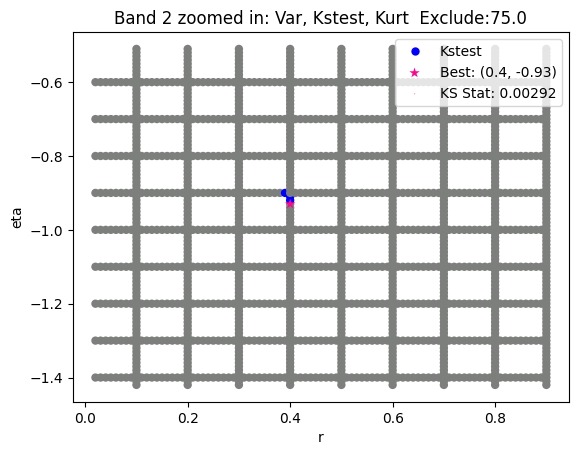

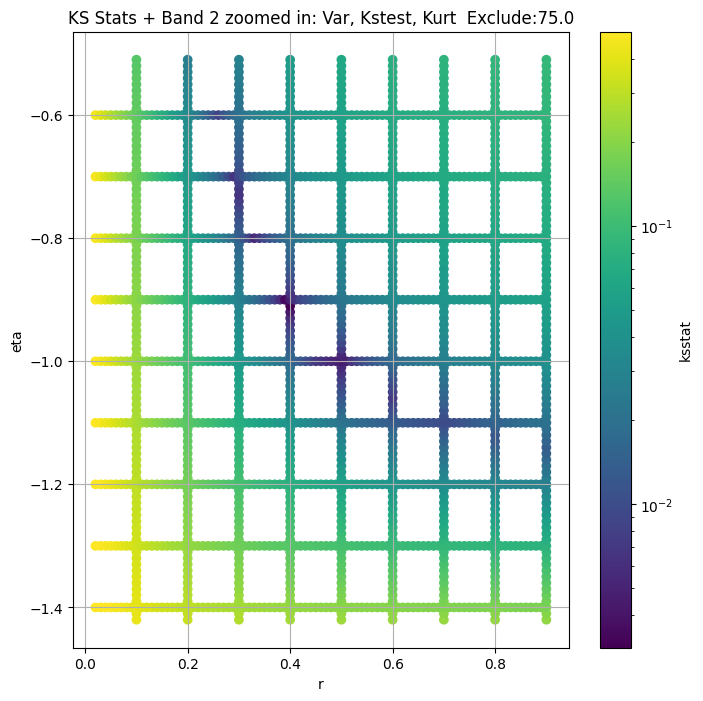

Band 3


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + 100 = 600, ksstat: 0.011760164079647544, var: 0.047586041819968776


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + 75 = 575, ksstat: 0.011458611641425451, var: 0.04928429243234195


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + 50 = 550, ksstat: 0.011148936004760919, var: 0.05107874502013965


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + 25 = 525, ksstat: 0.010825859158829401, var: 0.052974562971664106


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + 0 = 500, ksstat: 0.010833989966240753, var: 0.054989864146717686


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + -25 = 475, ksstat: 0.01058710236344381, var: 0.05715513133572668


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + -50 = 450, ksstat: 0.010334782315060333, var: 0.059466999150856216


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + -75 = 425, ksstat: 0.010075674509335886, var: 0.06193529908010626


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 3, 500.0 + -100 = 400, ksstat: 0.010262204116236573, var: 0.06462151232106689
Number of samples: 100000, Without approximation : 109656.0


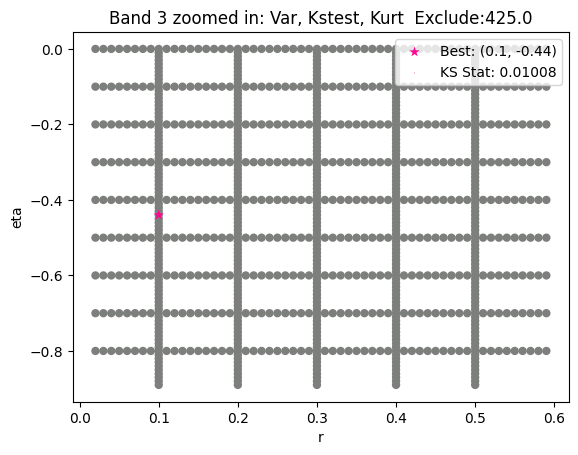

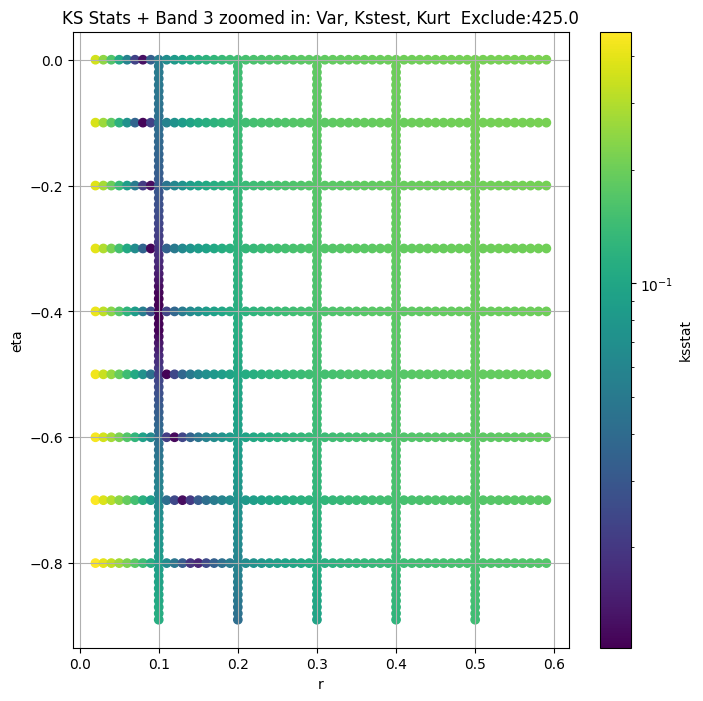

Band 5


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + 100 = 175, ksstat: 0.011883371809276594, var: 1.5652558024313545


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + 75 = 150, ksstat: 0.011235418643236503, var: 1.5913585268014983


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + 50 = 125, ksstat: 0.011152749057673092, var: 1.6188370145189828


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + 25 = 100, ksstat: 0.01110039742179833, var: 1.647977813671865


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + 0 = 75, ksstat: 0.010375805836552843, var: 1.6792233955501388


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + -25 = 50, ksstat: 0.01023811930535981, var: 1.7130632340379561


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + -50 = 25, ksstat: 0.010094938792577182, var: 1.750948558683777


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 5, 75.0 + -75 = 0, ksstat: 0.009810283633104447, var: 1.7976923134778813
Number of samples: 100000, Without approximation : 1086255.0


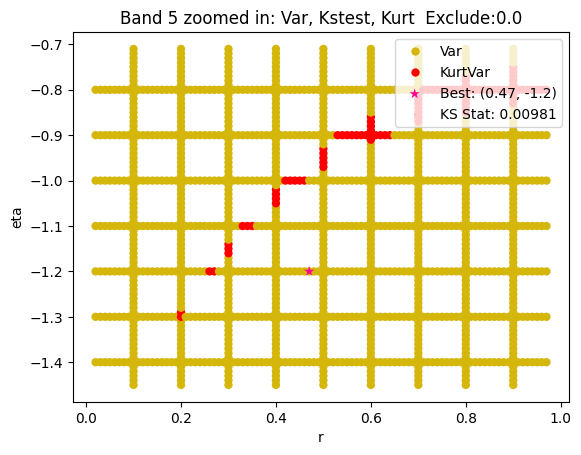

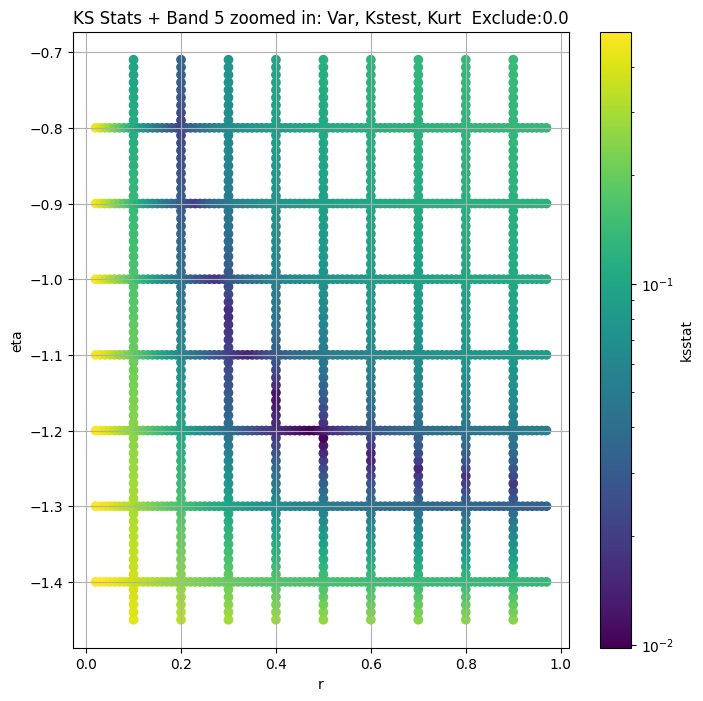

Band 6


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + 100 = 150, ksstat: 0.010525318825133523, var: 1.3820939083505173


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + 75 = 125, ksstat: 0.010697105897151504, var: 1.4049344955153111


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + 50 = 100, ksstat: 0.010574235194660497, var: 1.4290399779904226


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + 25 = 75, ksstat: 0.01086332999966938, var: 1.454558147677948


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + 0 = 50, ksstat: 0.010694238741490003, var: 1.4817712112775696


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + -25 = 25, ksstat: 0.010978329461486871, var: 1.511083542398612


  0%|          | 0/1298 [00:00<?, ?it/s]

Finding Minimum after computing 1298 CDFs
band 6, 50.0 + -50 = 0, ksstat: 0.010253579523990405, var: 1.5443181146728264
Number of samples: 100000, Without approximation : 548700.0


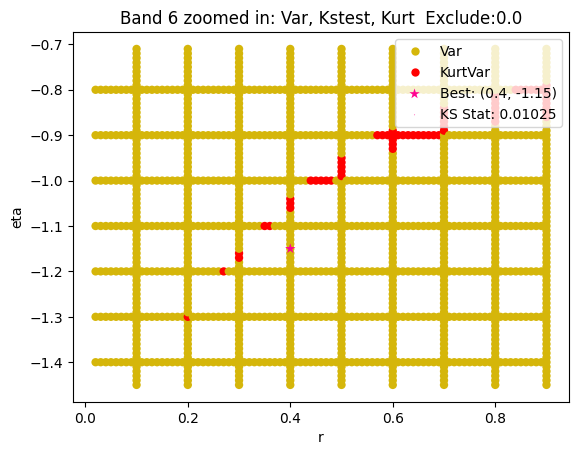

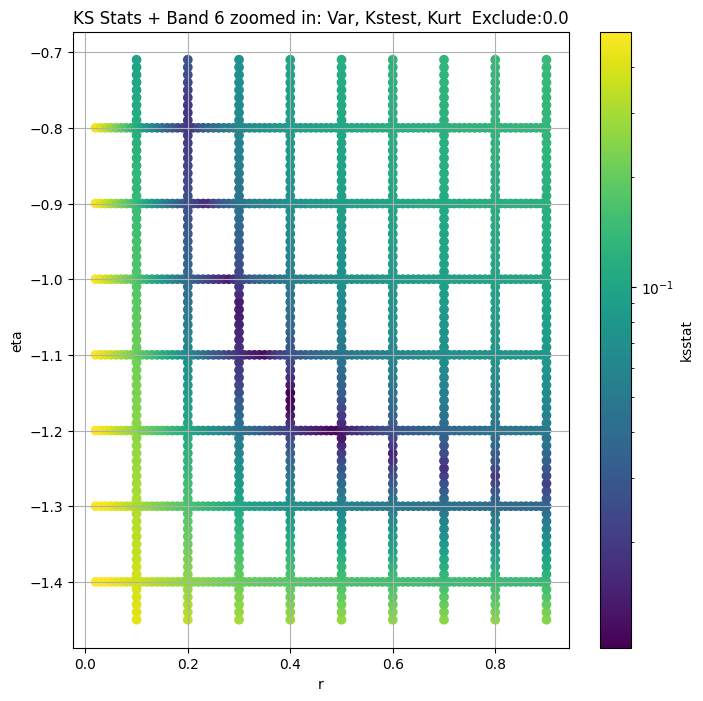

Band 8


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + 100 = 300, ksstat: 0.0047897306309876535, var: 0.12486291528346531


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + 75 = 275, ksstat: 0.004344181559029513, var: 0.1274831557265152


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + 50 = 250, ksstat: 0.0040743838070878, var: 0.1302903426035364


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + 25 = 225, ksstat: 0.004215637474435319, var: 0.13331049454339702


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + 0 = 200, ksstat: 0.0038670795764882415, var: 0.1365901237386756


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + -25 = 175, ksstat: 0.0029464947488573486, var: 0.14018214110251254


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + -50 = 150, ksstat: 0.0030686280573866687, var: 0.14414324607912046


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + -75 = 125, ksstat: 0.0024909692755151758, var: 0.14857526139771432


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 200.0 + -100 = 100, ksstat: 0.002699462868489544, var: 0.1536245419661541
Number of samples: 100000, Without approximation : 3556612.0


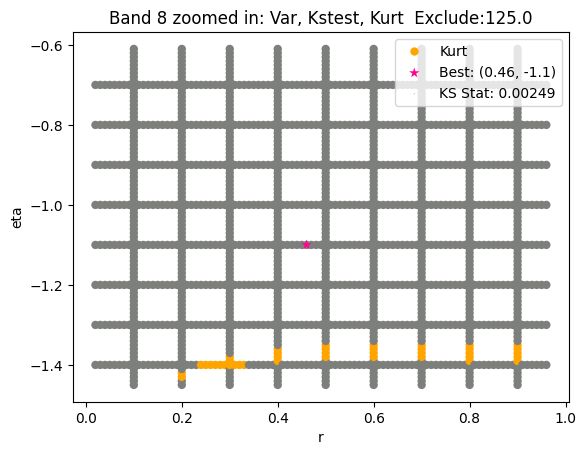

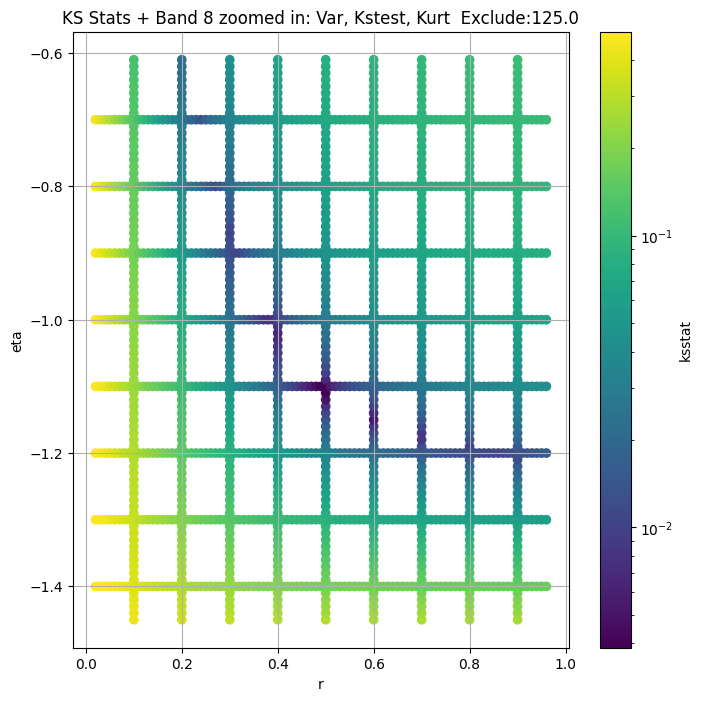

Band 9


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 100 = 100, ksstat: 0.0037837139557841265, var: 0.039565413361619756


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 75 = 75, ksstat: 0.003232612598949358, var: 0.04055909149278242


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 50 = 50, ksstat: 0.0033329471110641606, var: 0.04174725842483172


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 25 = 25, ksstat: 0.0022186121681883886, var: 0.04329487103658506


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 0 = 0, ksstat: 0.002376135404630289, var: 0.0462991698881081
Number of samples: 100000, Without approximation : 5336598.0


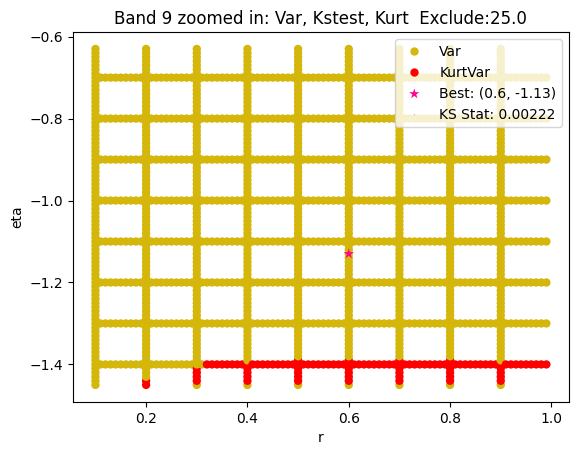

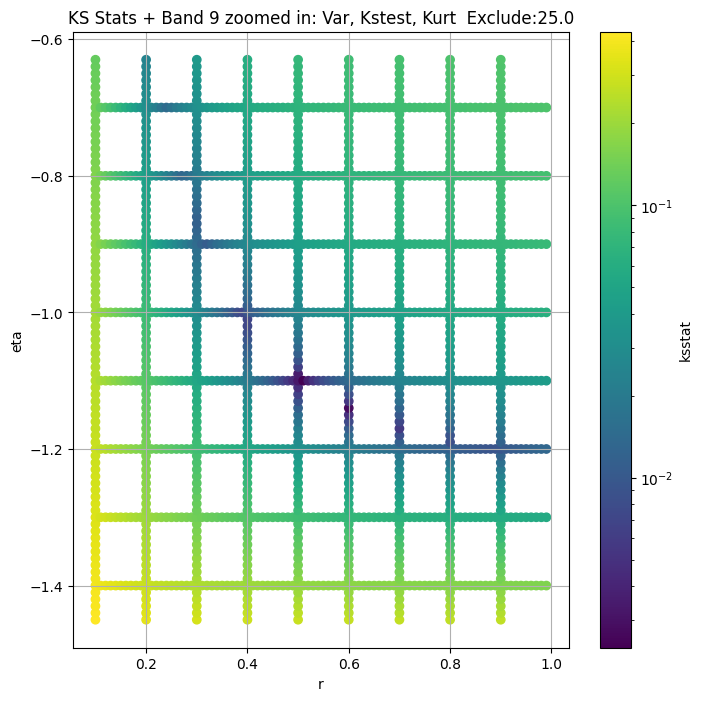

Band 11


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + 100 = 200, ksstat: 0.0052343654320647914, var: 0.01055479577604572


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + 75 = 175, ksstat: 0.005768313489518069, var: 0.010936749255923377


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + 50 = 150, ksstat: 0.005940811818937075, var: 0.011359148843305975


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + 25 = 125, ksstat: 0.004874902662985077, var: 0.011831334348196958


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + 0 = 100, ksstat: 0.005287127414753456, var: 0.012368668792461903


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + -25 = 75, ksstat: 0.0037097196480447153, var: 0.012993262435678297


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + -50 = 50, ksstat: 0.0038509706899432228, var: 0.013744811711543832


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + -75 = 25, ksstat: 0.0032194044061896188, var: 0.014715328113465919


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 100.0 + -100 = 0, ksstat: 0.0032699310002791693, var: 0.016433312708337287
Number of samples: 100000, Without approximation : 6762724.0


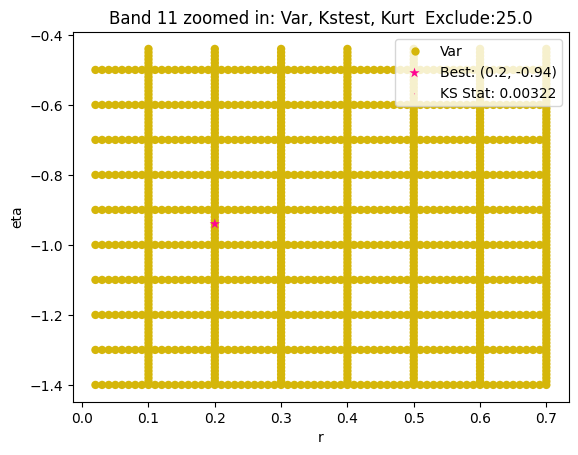

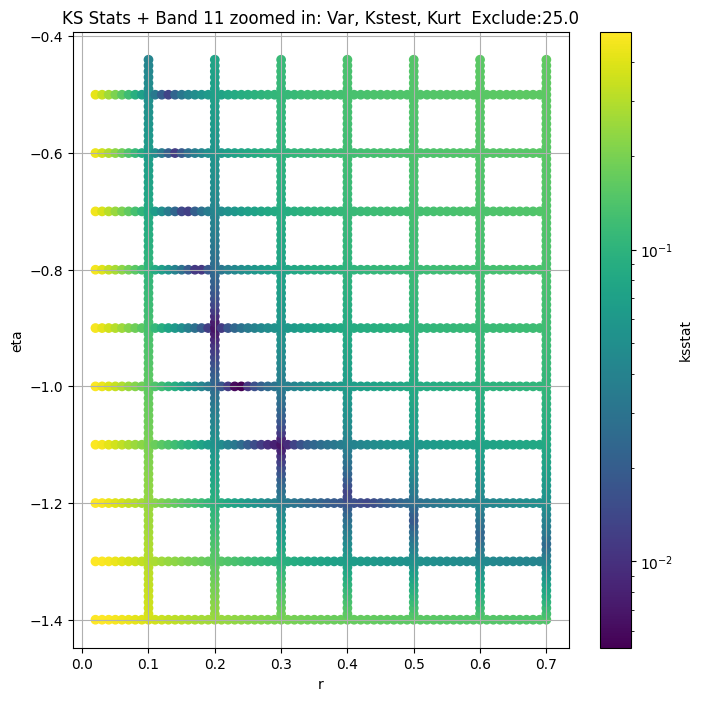

Band 12


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + 100 = 125, ksstat: 0.004764408939230379, var: 0.004565290091523616


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + 75 = 100, ksstat: 0.004703028769949873, var: 0.004818350070020735


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + 50 = 75, ksstat: 0.004997029248692775, var: 0.005116484573347985


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + 25 = 50, ksstat: 0.0032624279698436273, var: 0.005482767888822784


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + 0 = 25, ksstat: 0.002988176423952462, var: 0.005967990120357517


  0%|          | 0/927 [00:00<?, ?it/s]

Finding Minimum after computing 927 CDFs
band 12, 25.0 + -25 = 0, ksstat: 0.002888031202998298, var: 0.006913674958767021
Number of samples: 100000, Without approximation : 22271101.0


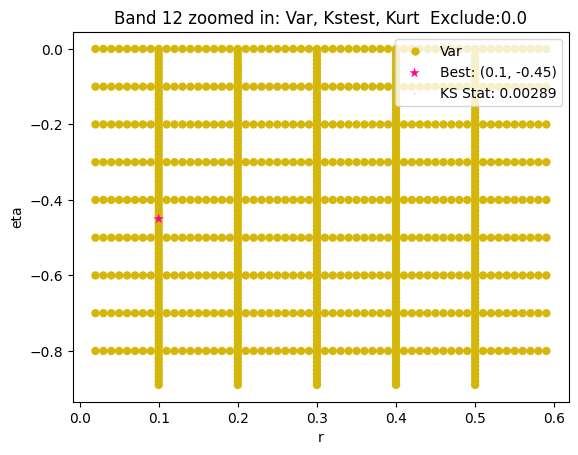

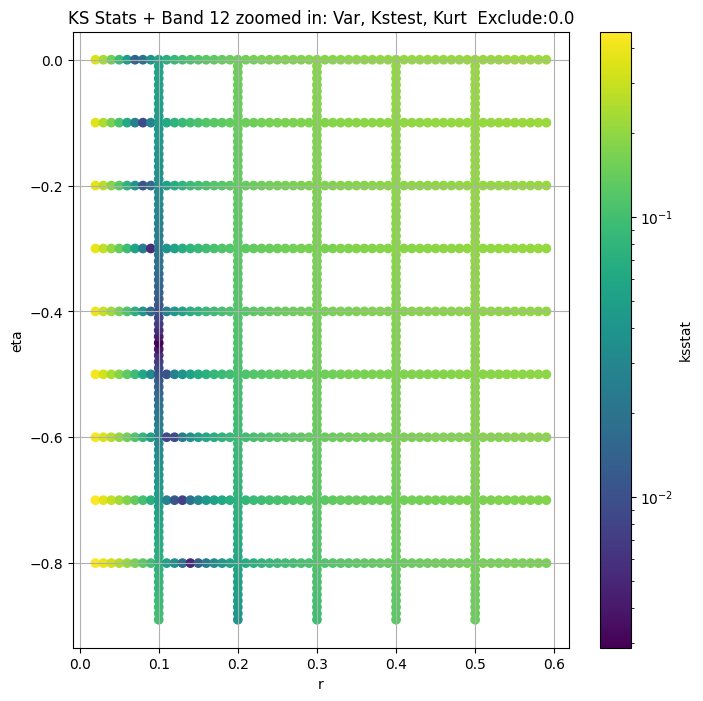

Band 14


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + 100 = 125, ksstat: 0.0047168893561521045, var: 0.00028888245433430137


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + 75 = 100, ksstat: 0.00506789167779639, var: 0.00030433941271743677


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + 50 = 75, ksstat: 0.004482737931435242, var: 0.0003225449658495989


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + 25 = 50, ksstat: 0.003461619056956265, var: 0.0003449385703399197


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + 0 = 25, ksstat: 0.003044180168284673, var: 0.00037489887911339577


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 14, 25.0 + -25 = 0, ksstat: 0.004524331384424818, var: 0.00046689526182187223
Number of samples: 100000, Without approximation : 12539235.0


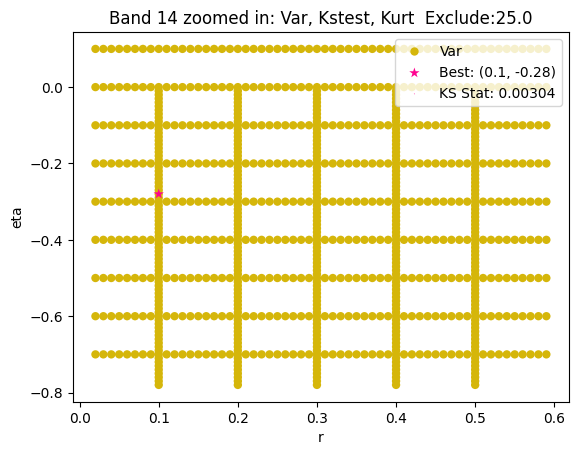

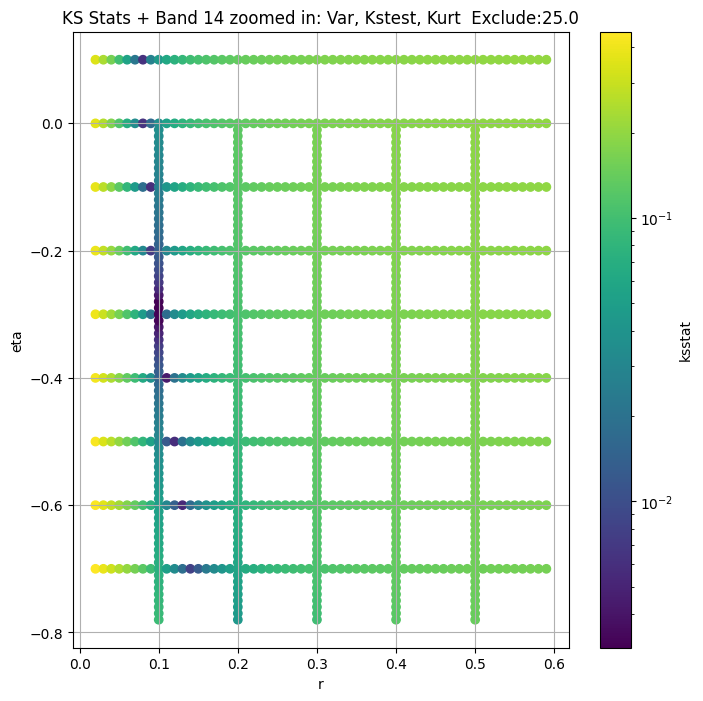

Band 16


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + 100 = 400, ksstat: 0.007528945389267405, var: 1.9557058879567027e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + 75 = 375, ksstat: 0.007994040753722259, var: 2.049321895721079e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + 50 = 350, ksstat: 0.00741918495364885, var: 2.152747360141048e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + 25 = 325, ksstat: 0.006708060597883203, var: 2.2677144740653185e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + 0 = 300, ksstat: 0.0061121474910589176, var: 2.3963605297254062e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + -25 = 275, ksstat: 0.006202100839088953, var: 2.5411534657203396e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + -50 = 250, ksstat: 0.006221816540928848, var: 2.7051326160609784e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + -75 = 225, ksstat: 0.006255954598831881, var: 2.892283500727957e-05


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 16, 300.0 + -100 = 200, ksstat: 0.007866320745985311, var: 3.1076249969768346e-05
Number of samples: 100000, Without approximation : 8199664.0


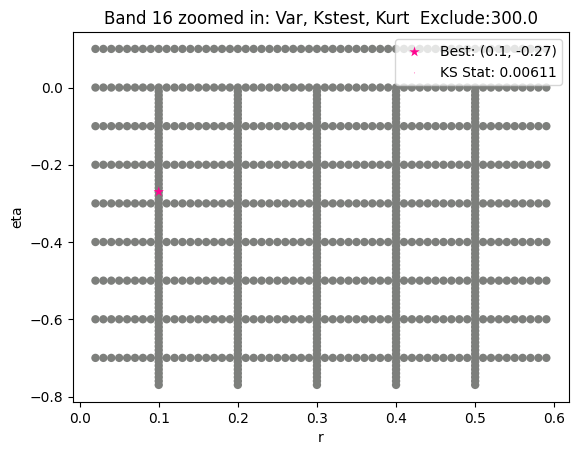

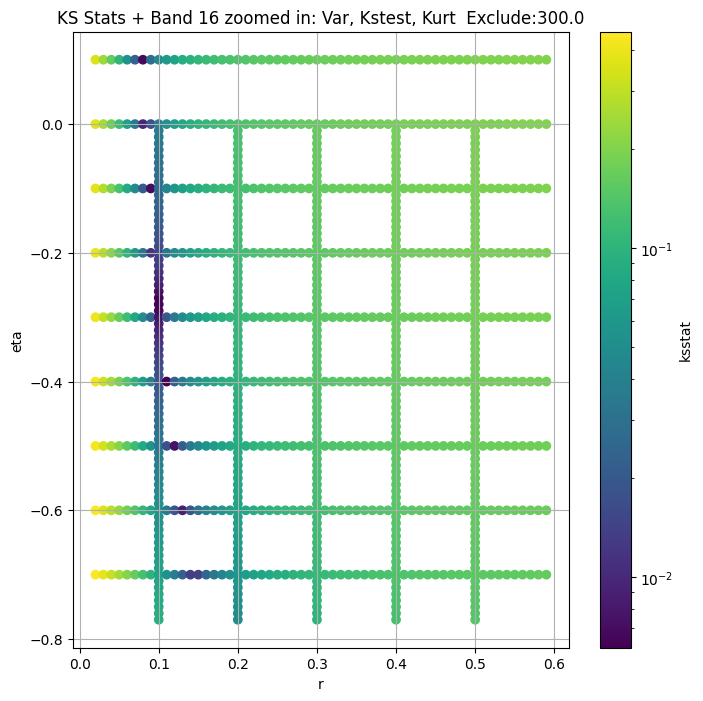

obs_var  var_lower  var_upper    obs_kurt  kurt_lower   kurt_upper  \
band                                                                        
2     0.015341   0.011793   0.019896  102.005766   45.615246   155.675962   
3     0.185978   0.146709   0.230087   74.103587   59.877733    90.725954   
5     1.797692   1.637296   1.963972   10.521700    9.181393    11.971747   
6     1.544318   1.409121   1.683306    9.932279    8.877620    11.035971   
8     0.189802   0.164122   0.219125   29.858671   20.356153    40.820327   
9     0.046299   0.041095   0.052620   20.826506   11.310724    47.855935   
11    0.016433   0.013552   0.019878   52.489348   32.374524    95.887777   
12    0.006914   0.005487   0.008786   81.450725   44.067905   173.960469   
14    0.000467   0.000345   0.000849  414.737436   42.091085  1292.568079   
16    0.000101   0.000063   0.000171  410.975885  117.849619  1103.934584   

      total_samples  kstest_stat_initial  initial_r  initial_eta  \
band                                                               
2           98473.0             0.004365        0.5         -1.0   
3          109656.0             0.010930        0.1         -0.4   
5         1086255.0             0.010376        0.5         -1.2   
6          548700.0             0.010694        0.5         -1.2   
8         3556612.0             0.003867        0.5         -1.1   
9         5336598.0             0.003331        0.5         -1.1   
11        6762724.0             0.006592        0.2         -0.9   
12       22271101.0             0.004700        0.1         -0.4   
14       12539235.0             0.003161        0.1         -0.3   
16        8199664.0             0.007652        0.1         -0.3   

      initial_scale  initial_exclude_cutoff  best_augmented_var  \
band                                                              
2      4.866756e-03                   100.0            0.010350   
3      8.202025e-14                   500.0            0.061935   
5      1.749191e+00                    75.0            1.797692   
6      1.543512e+00                    50.0            1.544318   
8      9.485425e-02                   200.0            0.148575   
9      3.215220e-02                     0.0            0.043295   
11     4.908202e-06                   100.0            0.014715   
12     8.901568e-15                    25.0            0.006914   
14     2.929044e-16                    25.0            0.000375   
16     1.872251e-17                   300.0            0.000024   

      kstest_stat_cutoff_0.05  kstest_stat_best  best_r  best_eta  \
band                                                                
2                    0.004326          0.002924    0.40     -0.93   
3                    0.004100          0.010076    0.10     -0.44   
5                    0.001303          0.009810    0.47     -1.20   
6                    0.001833          0.010254    0.40     -1.15   
8                    0.000720          0.002491    0.46     -1.10   
9                    0.000588          0.002219    0.60     -1.13   
11                   0.000522          0.003219    0.20     -0.94   
12                   0.000288          0.002888    0.10     -0.45   
14                   0.000384          0.003044    0.10     -0.28   
16                   0.000474          0.006112    0.10     -0.27   

        best_scale  best_exclude_cutoff  n_pval_0.05  
band                                                  
2     1.678256e-03                 75.0       221563  
3     1.211707e-13                425.0        17347  
5     1.552668e+00                  0.0        19093  
6     5.796941e-01                  0.0        17146  
8     7.807815e-02                125.0       300423  
9     5.442503e-02                 25.0       375228  
11    7.305504e-06                 25.0       178312  
12    1.449272e-14                  0.0       220207  
14    2.586694e-16                 25.0       195925  
16    1.554713e-17        

In [15]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS))) # By default, does one iteration per group
NUM_SAMPLES_OPTIMIZE = 2000
EXCLUDE_CUTOFFS_OPTIMIZE = np.arange(100, -101, -25)

if RERUN or not master_df_optimized_path.exists():

    if SKIP_OPTIMIZE_STEP:

        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
        master_df[f'best_scale'] = master_df['initial_scale']
        master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

    else:
        for group in GROUPS: # TODO For quick testing purposes
            print(f"{GROUP.capitalize()} {group}")
            master_df.loc[group, 'kstest_stat_best'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r'] = master_df.loc[group, 'initial_r']
            master_df.loc[group, 'best_eta'] = master_df.loc[group, 'initial_eta']
            master_df.loc[group, 'best_scale'] = master_df.loc[group, 'initial_scale']

            sample = group_data_map[group]
            if len(sample) == 0:
                continue
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            eps = 0.5
            group_cdfs_df = fine_cdfs_df[(np.abs(master_df.loc[group, 'initial_r'] - fine_cdfs_df['r']) < eps) & 
                                        (np.abs(master_df.loc[group, 'initial_eta'] - fine_cdfs_df['eta']) < eps)].reset_index(drop=True)
            group_cdfs = {x[0]:x[1] for x in group_cdfs_df['(r,eta),cdf']}

            for adjust_exclude_cutoff in EXCLUDE_CUTOFFS_OPTIMIZE: # -50, -25, 0, 25, 50
                
                exclude_cutoff = int(max(0, adjust_exclude_cutoff + master_df.loc[group, 'initial_exclude_cutoff']))
                
                if exclude_cutoff == 0:
                    augmented_var = np.var(group_data_map[group])
                else:
                    augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])                       

                group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
                ksstats, initial_param, min_stat = gridsearch(sample, group_cdfs, debug=True, scales=group_cdfs_df['scale'])
                
                cutoff_label = generate_cutoff_label(adjust_exclude_cutoff)

                augmented_var_df.loc[group, f"kstest_stat_{cutoff_label}"] = min_stat
                group_cdfs_df[f'ksstat_exclude_{cutoff_label}'] = ksstats
                
                print(f"{GROUP} {group}, {master_df.loc[group, 'initial_exclude_cutoff']} + {adjust_exclude_cutoff} = {exclude_cutoff}, ksstat: {min_stat}, var: {augmented_var}")
                best_adjust = 0

                if min_stat < master_df.loc[group, 'kstest_stat_best']:

                    inital_min_stat = min_stat
                    inital_best_param = initial_param
                    master_df.loc[group, 'kstest_stat_best'] = min_stat
                    initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                    master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = initial_param
                    master_df.loc[group, 'best_scale'] = initial_scale
                    master_df.loc[group, 'best_exclude_cutoff'] = exclude_cutoff
                    master_df.loc[group, 'best_augmented_var'] = augmented_var
                    augmented_var_df.loc[group, 'best_augmented_var'] = augmented_var
                    best_adjust = adjust_exclude_cutoff

                if exclude_cutoff == 0:
                    break

            cutoff_label = generate_cutoff_label(best_adjust)
            ksstats = group_cdfs_df[f"ksstat_exclude_{cutoff_label}"]
            
            print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
            
            cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
            master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

            best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

            group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
            group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

            group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

            group_dict = rEtaKsstats_dict[group]
            group_dict.update({'r_optimize' : group_cdfs_df['r'], 'eta_optimize' : group_cdfs_df['eta'], f'ksstat_exclude_{cutoff_label}' : ksstats})
            rEtaKsstats_dict[group] = group_dict

            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(group_cdfs_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}  Exclude:{master_df.loc[group, 'best_exclude_cutoff']}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']),
                                best_ksstat=master_df.loc[group, 'kstest_stat_best'])
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'initial_exclude_cutoff', 'best_r', 'best_eta', 'best_scale', 'kstest_stat_best', 'best_exclude_cutoff', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    augmented_var_df.to_csv(augmented_var_df_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)

rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
augmented_var_df = pd.read_csv(augmented_var_df_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

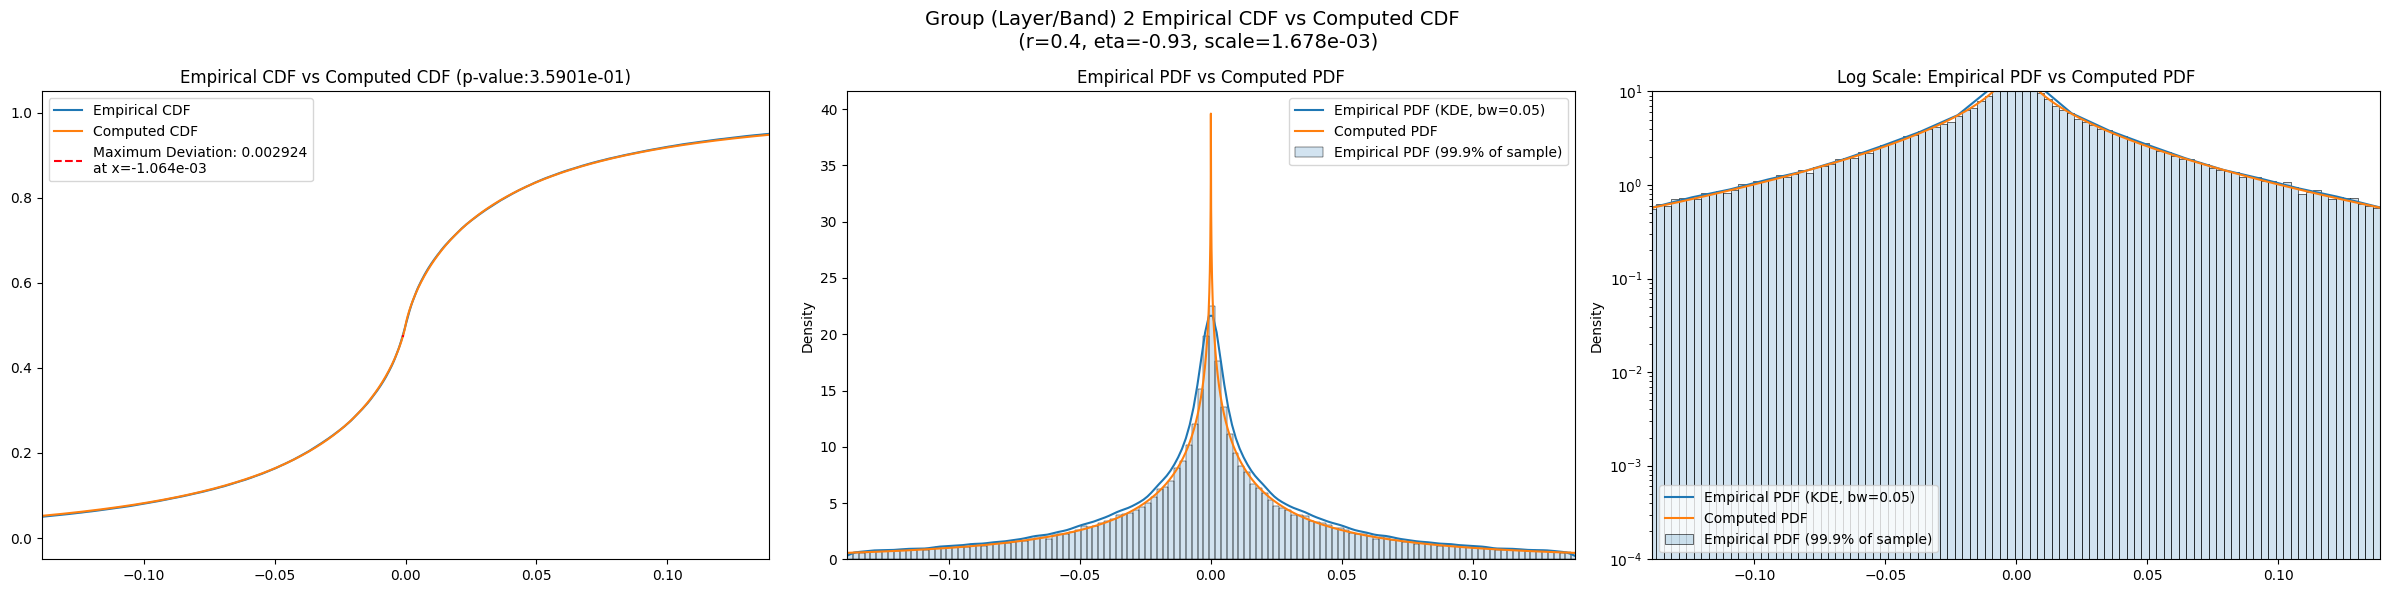

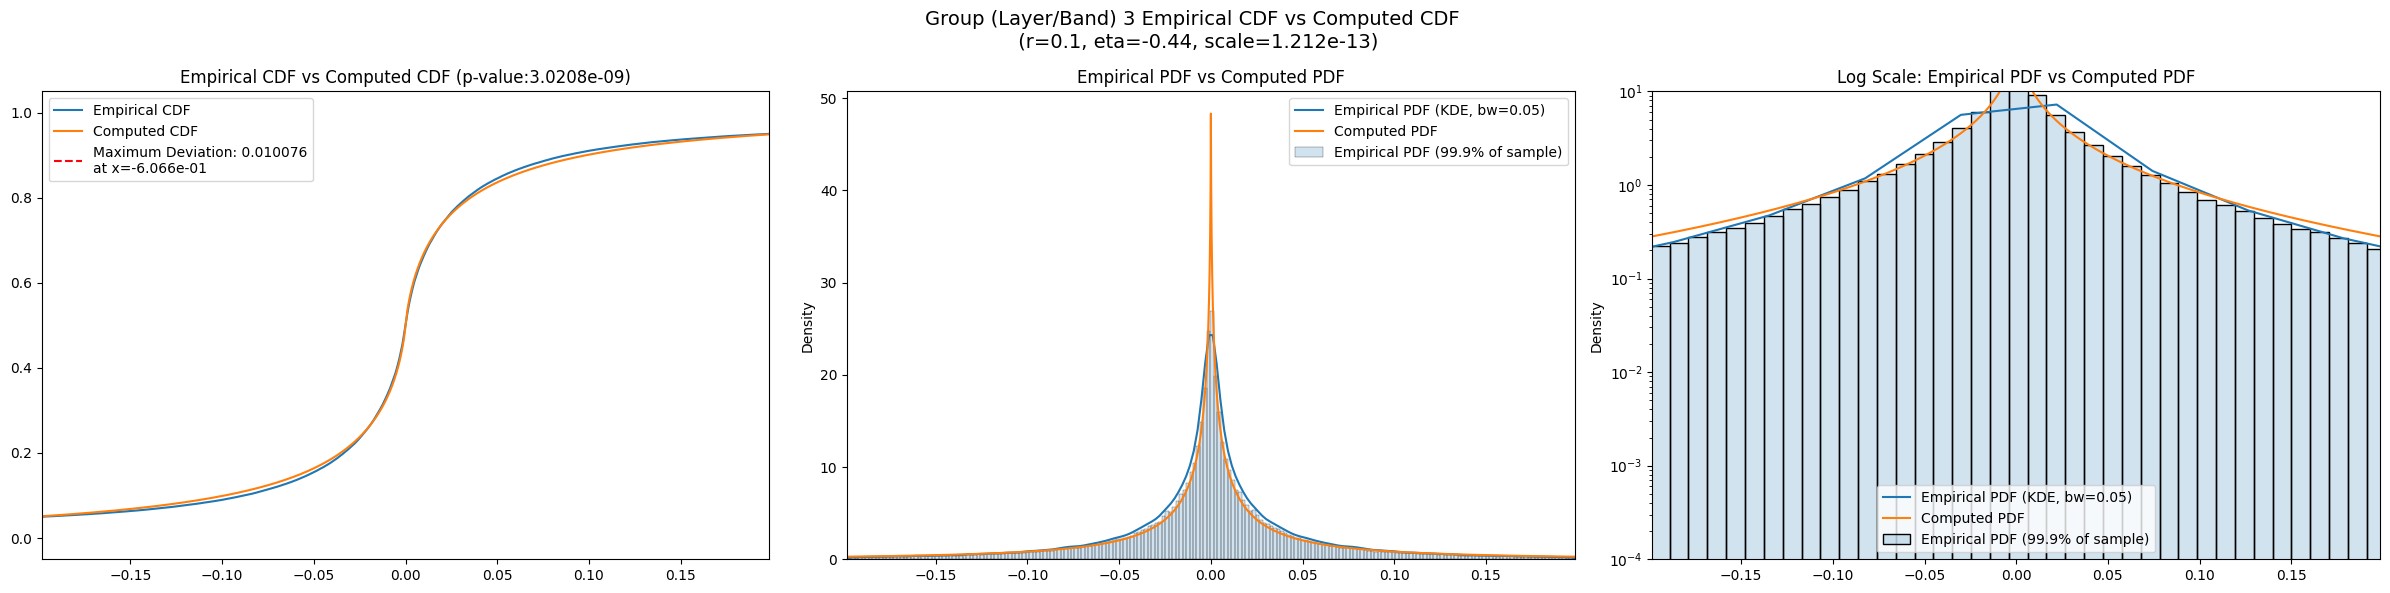

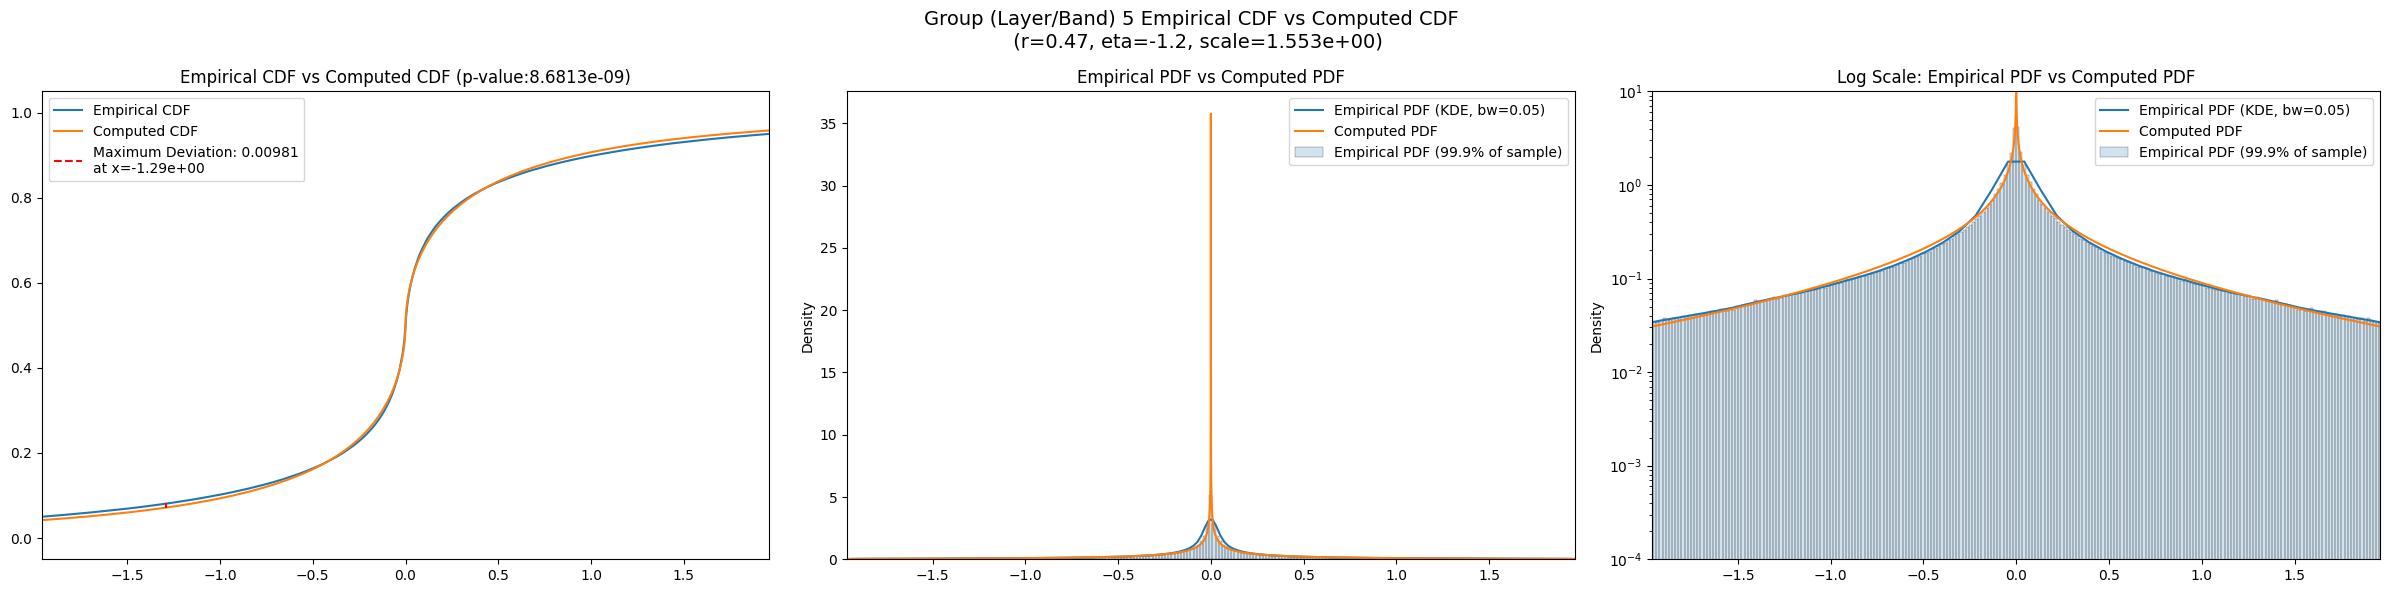

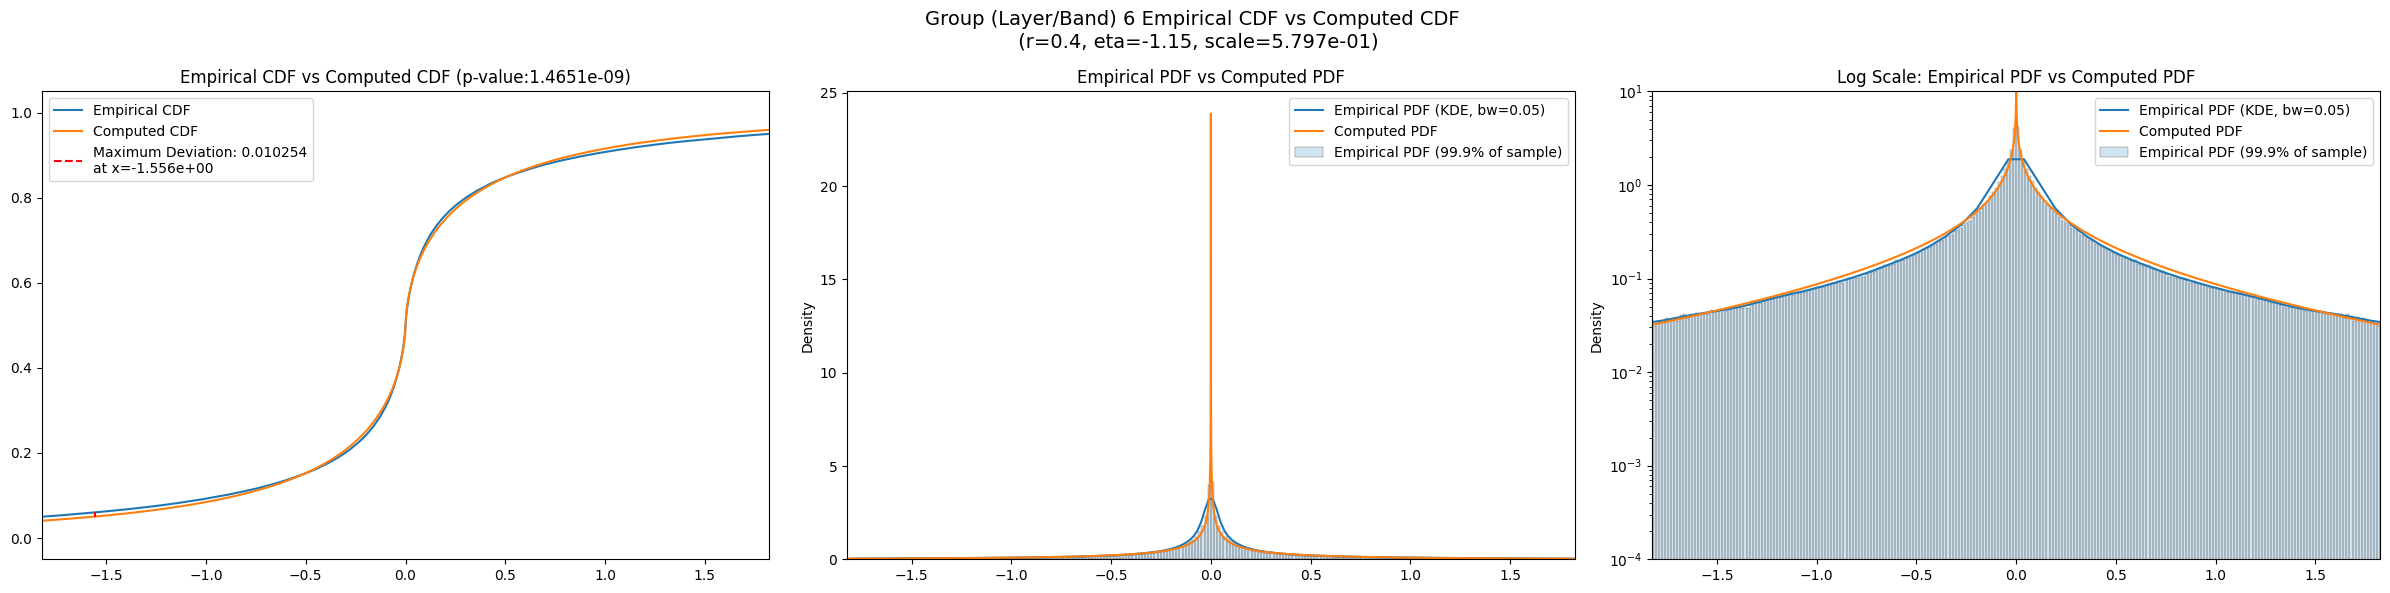

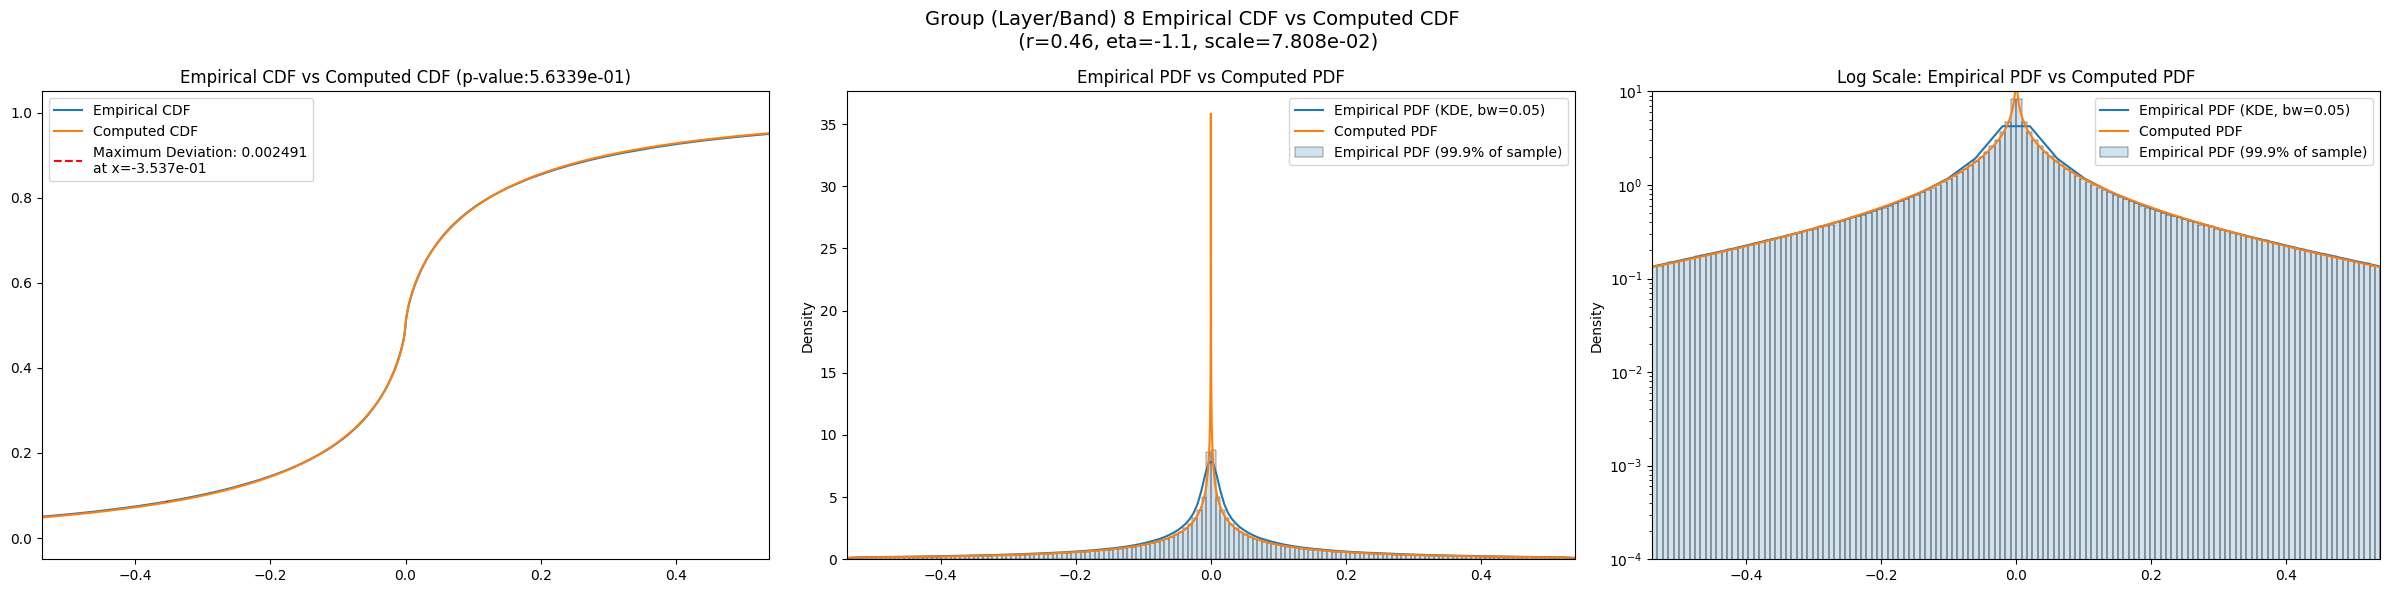

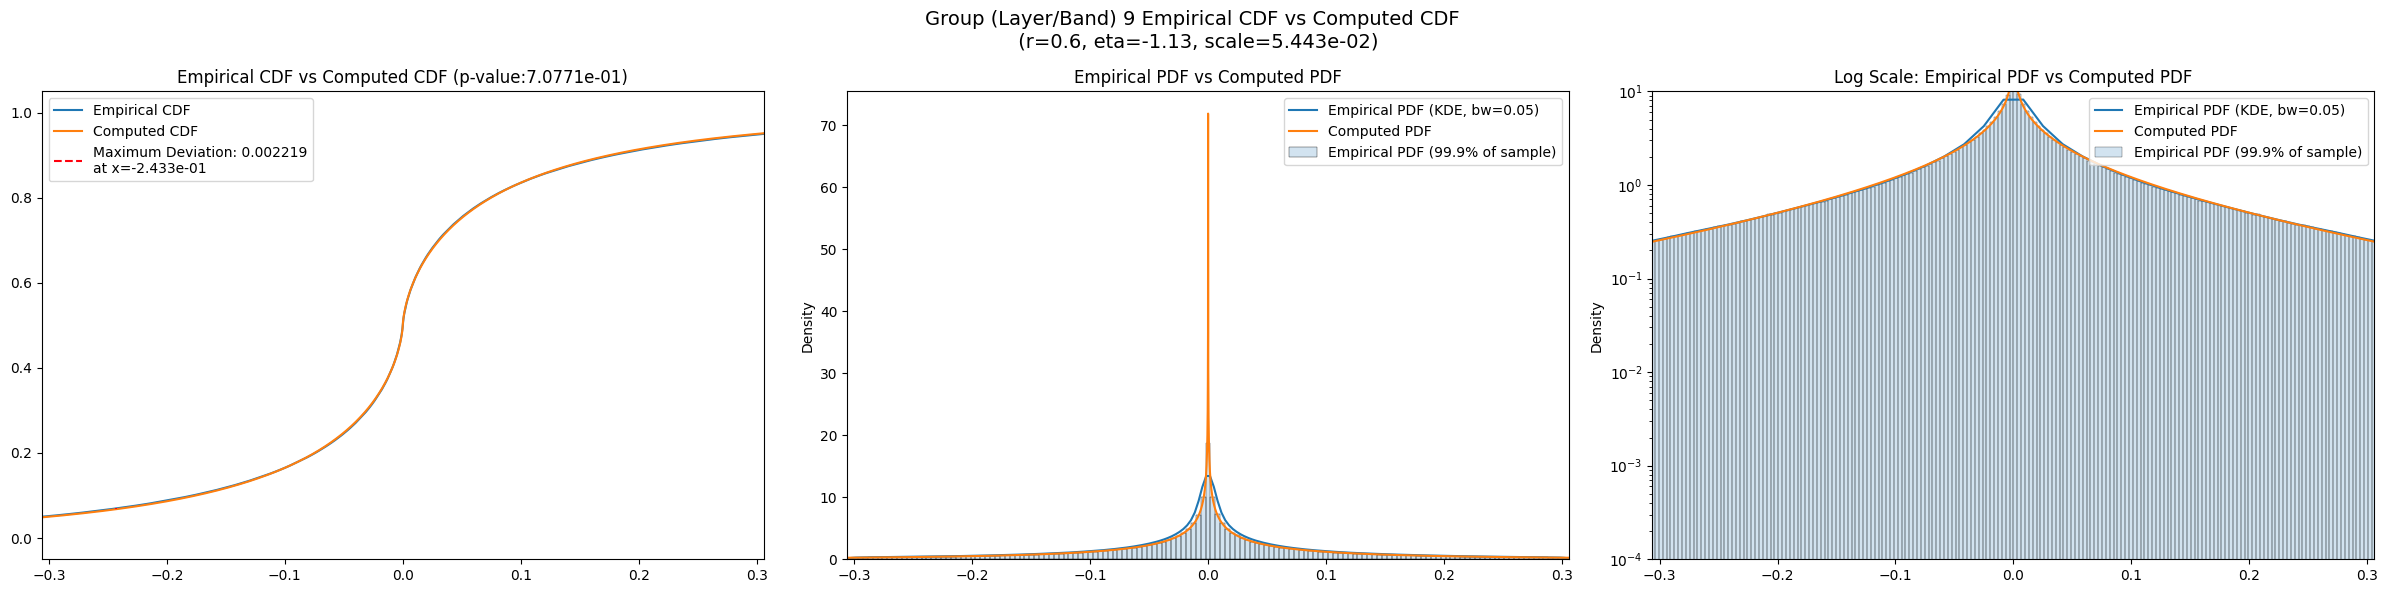

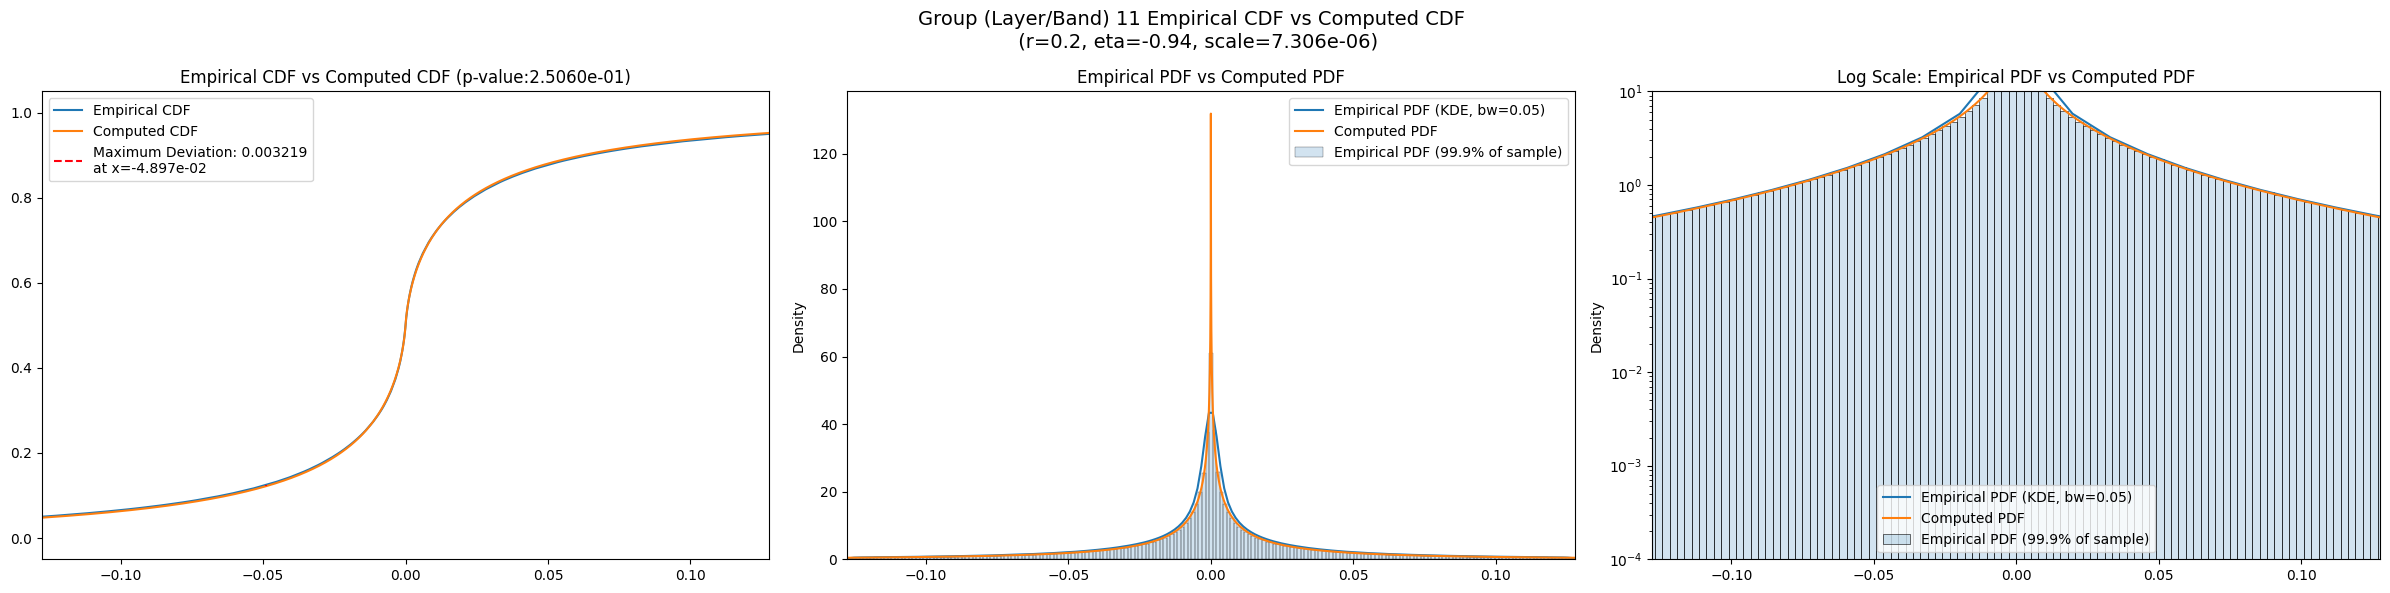

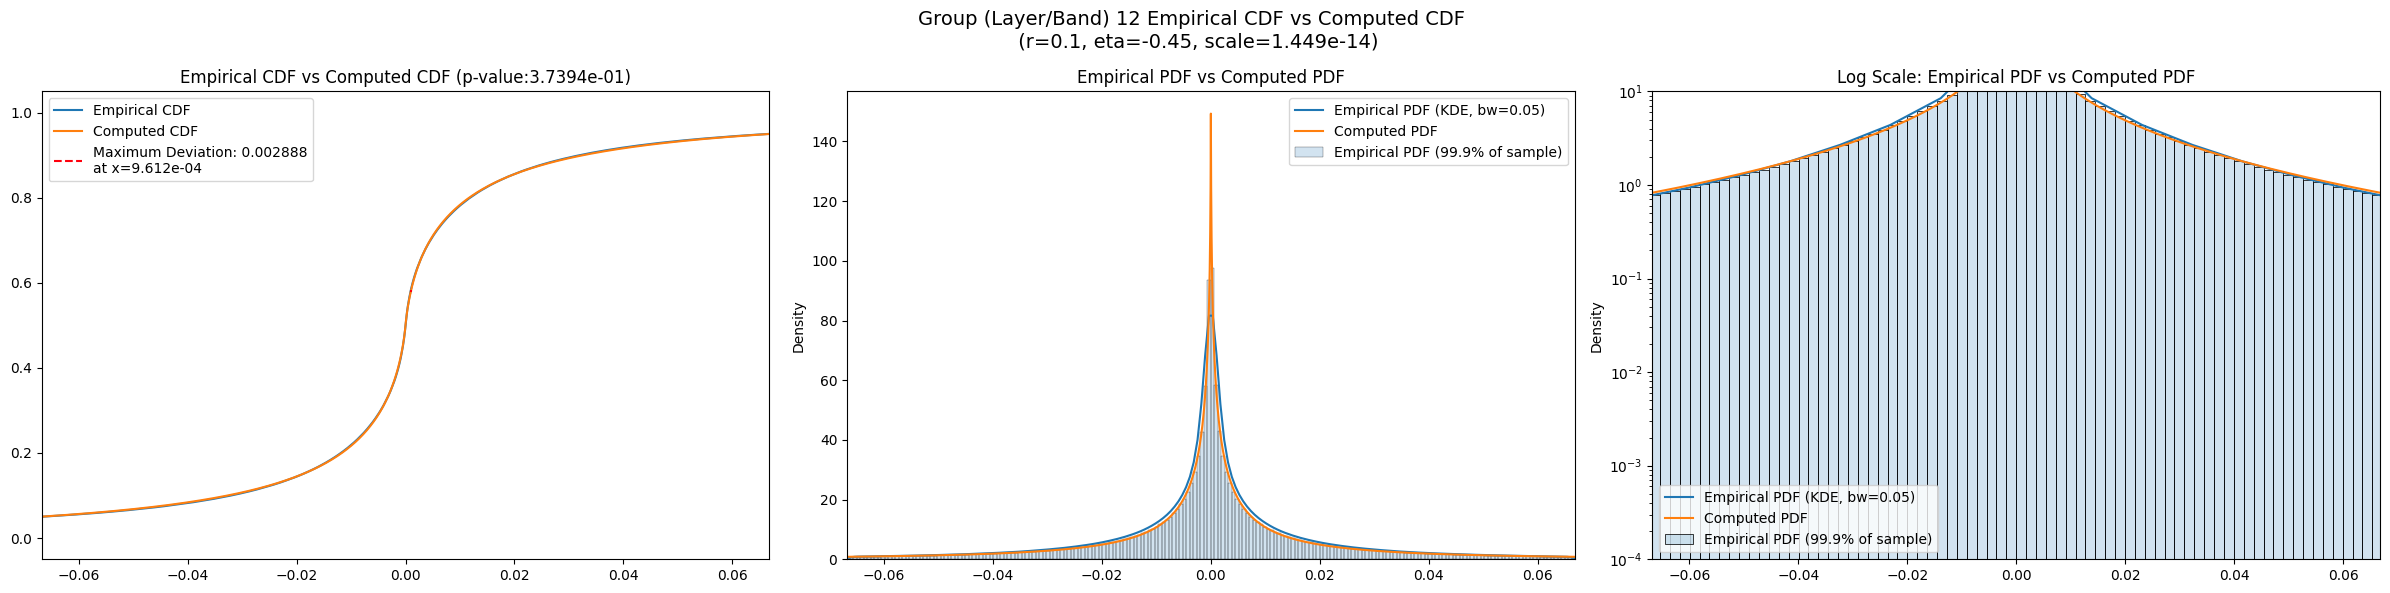

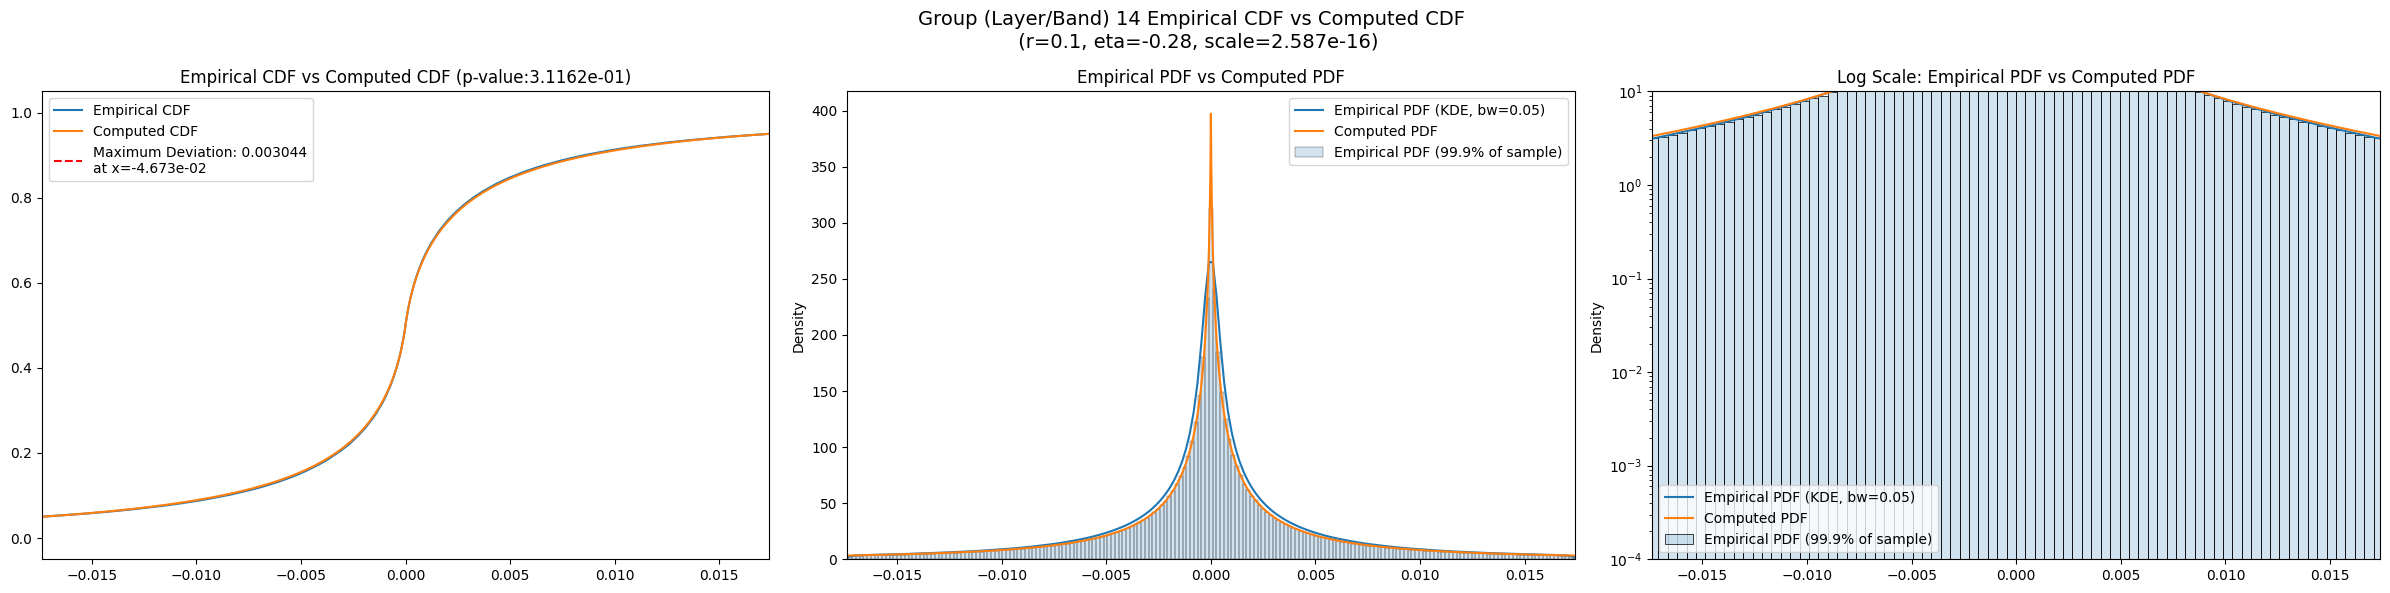

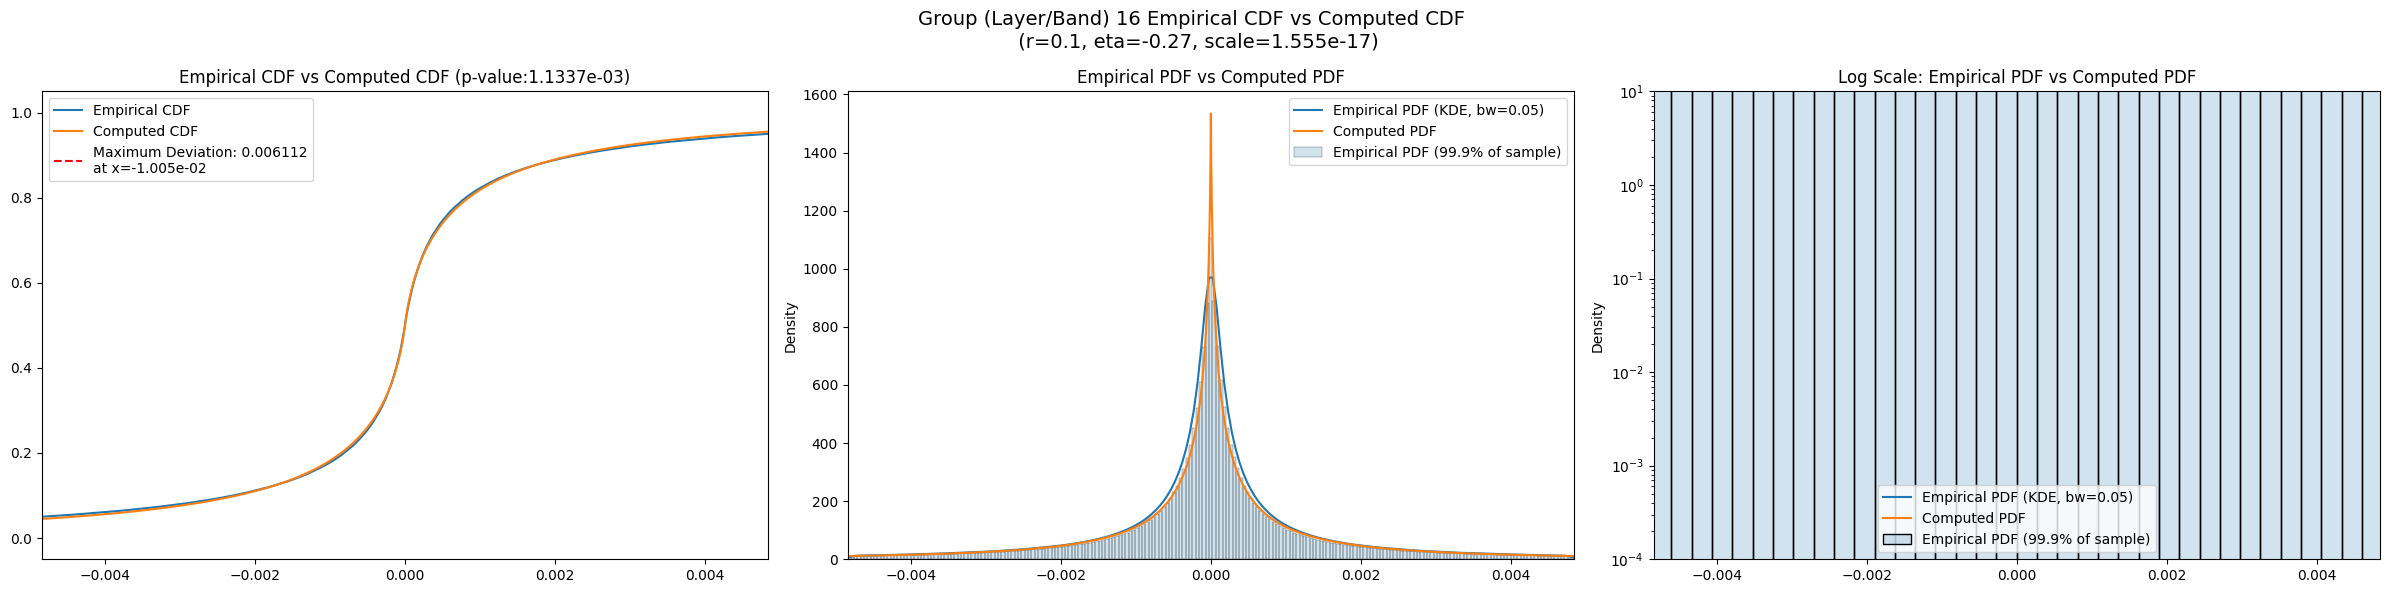

In [16]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    best_scale = group_info['best_scale']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta, best_scale), 
                    log_scale = True,
                    group = group)
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 100)

## Comparing with Gaussian and Laplace Priors

In [17]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func
    elif distro == 'prior_with_scale':
        def r_eta_scale_func(params):
            r = params[0]
            eta = params[1]
            scale = params[2]
            print(r, eta, scale)
            cdf = compute_prior_cdf(r = r, eta = eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample/ np.sqrt(scale), cdf)
        return r_eta_scale_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior','prior_with_scale', 't'")

In [18]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        if len(group_data_map[group]) == 0:
            continue
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var  var_lower  var_upper    obs_kurt  kurt_lower   kurt_upper  \
band                                                                        
2     0.015341   0.011793   0.019896  102.005766   45.615246   155.675962   
3     0.185978   0.146709   0.230087   74.103587   59.877733    90.725954   
5     1.797692   1.637296   1.963972   10.521700    9.181393    11.971747   
6     1.544318   1.409121   1.683306    9.932279    8.877620    11.035971   
8     0.189802   0.164122   0.219125   29.858671   20.356153    40.820327   
9     0.046299   0.041095   0.052620   20.826506   11.310724    47.855935   
11    0.016433   0.013552   0.019878   52.489348   32.374524    95.887777   
12    0.006914   0.005487   0.008786   81.450725   44.067905   173.960469   
14    0.000467   0.000345   0.000849  414.737436   42.091085  1292.568079   
16    0.000101   0.000063   0.000171  410.975885  117.849619  1103.934584   

      total_samples  kstest_stat_initial  initial_r  initial_eta  ...  \
band                                                              ...   
2           98473.0             0.004365        0.5         -1.0  ...   
3          109656.0             0.010930        0.1         -0.4  ...   
5         1086255.0             0.010376        0.5         -1.2  ...   
6          548700.0             0.010694        0.5         -1.2  ...   
8         3556612.0             0.003867        0.5         -1.1  ...   
9         5336598.0             0.003331        0.5         -1.1  ...   
11        6762724.0             0.006592        0.2         -0.9  ...   
12       22271101.0             0.004700        0.1         -0.4  ...   
14       12539235.0             0.003161        0.1         -0.3  ...   
16        8199664.0             0.007652        0.1         -0.3  ...   

      param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band                                                               
2           0.047541              0.063775                   0.0   
3           0.045024              0.077241                   0.0   
5           0.420140              0.095265                   0.0   
6           0.391681              0.091094                   0.0   
8           0.155358              0.075971                   0.0   
9           0.091686              0.074665                   0.0   
11          0.029191              0.086672                   0.0   
12          0.015102              0.083414                   0.0   
14          0.004238              0.079299                   0.0   
16          0.001105              0.081852                   0.0   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace   param_t  \
band                                                                      
2          0.040855             0.037913        2.018150e-123  0.032251   
3          0.039932             0.052912        2.869310e-267  0.030075   
5          0.360004             0.071171         0.000000e+00  0.275057   
6          0.339973             0.066555         0.000000e+00  0.258901   
8          0.133338             0.050733         0.000000e+00  0.103972   
9          0.078265             0.049701         0.000000e+00  0.061289   
11         0.025106             0.062417         0.000000e+00  0.019201   
12         0.013056             0.059293         0.000000e+00  0.009939   
14         0.003709             0.054335         0.000000e+00  0.002837   
16         0.000975             0.056826         0.000000e+00  0.000747   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
band                                                      
2          0.040244  5.205280e-139          3.683244e-01  
3          0.050780  3.497600e-246          4.252220e-10  
5          0.071299   0.000000e+00          3.113884e-91  
6          0.065901   0.000000e+00          1.547728e-50  
8          0.052267   0.000000e+00          1.354674e-19  
9          0.051896   0.000000e+00          3.049853e-23  
11         0.06

## Results

In [19]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [20]:
master_df.filter(regex="kstest_stat.*")

kstest_stat_initial  kstest_stat_cutoff_0.05  kstest_stat_best  \
band                                                                   
2                0.004365                 0.004326          0.002924   
3                0.010930                 0.004100          0.010076   
5                0.010376                 0.001303          0.009810   
6                0.010694                 0.001833          0.010254   
8                0.003867                 0.000720          0.002491   
9                0.003331                 0.000588          0.002219   
11               0.006592                 0.000522          0.003219   
12               0.004700                 0.000288          0.002888   
14               0.003161                 0.000384          0.003044   
16               0.007652                 0.000474          0.006112   

      kstest_stat_gaussian  kstest_stat_laplace  kstest_stat_t  
band                                                            
2                 0.063775             0.037913       0.040244  
3                 0.077241             0.052912       0.050780  
5                 0.095265             0.071171       0.071299  
6                 0.091094             0.066555       0.065901  
8                 0.075971             0.050733       0.052267  
9                 0.074665             0.049701       0.051896  
11                0.086672             0.062417       0.062586  
12                0.083414             0.059293       0.059041  
14                0.079299             0.054335       0.053343  
16                0.081852             0.056826       0.054461

In [21]:
master_df.filter(regex="best.*")

best_augmented_var  kstest_stat_best  best_r  best_eta    best_scale  \
band                                                                         
2               0.010350          0.002924    0.40     -0.93  1.678256e-03   
3               0.061935          0.010076    0.10     -0.44  1.211707e-13   
5               1.797692          0.009810    0.47     -1.20  1.552668e+00   
6               1.544318          0.010254    0.40     -1.15  5.796941e-01   
8               0.148575          0.002491    0.46     -1.10  7.807815e-02   
9               0.043295          0.002219    0.60     -1.13  5.442503e-02   
11              0.014715          0.003219    0.20     -0.94  7.305504e-06   
12              0.006914          0.002888    0.10     -0.45  1.449272e-14   
14              0.000375          0.003044    0.10     -0.28  2.586694e-16   
16              0.000024          0.006112    0.10     -0.27  1.554713e-17   

      best_exclude_cutoff  
band                       
2                    75.0  
3                   425.0  
5                     0.0  
6                     0.0  
8                   125.0  
9                    25.0  
11                   25.0  
12                    0.0  
14                   25.0  
16                  300.0